## Importing the necessary packages ##

In [40]:
import pandas as pd 
import numpy as np 
import re 
import sys
import matplotlib.pyplot as plt
import json 
import numpy as np
import pandas as pd
import re, nltk, spacy, string
import en_core_web_sm
nlp = en_core_web_sm.load()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

# hide warnings
import warnings
warnings.filterwarnings('ignore')


# set options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [41]:
df = pd.read_excel('C:/Users/JU486WK/OneDrive - EY\Desktop/Talent Hypothesis/GDS ES India - Joiners and Offer data_FY22 and FY23 until 17th Oct 2022.xlsx', sheet_name='Offer Data')

In [42]:
df.head(10)

Masked ID                                Hiretype Title  \
0   ID 1000  Re Hire Employee Boomerang - Post June    Mr   
1   ID 1001                 New Employee - PostJune    Mr   
2   ID 1002  Re Hire Employee Boomerang - Post June    Mr   
3   ID 1003                 New Employee - PostJune    Mr   
4   ID 1004                 New Employee - PostJune    Mr   
5   ID 1005                 New Employee - PostJune    Ms   
6   ID 1006                 New Employee - PostJune    Mr   
7   ID 1007                 New Employee - PostJune    Ms   
8   ID 1008                 New Employee - PostJune    Mr   
9   ID 1009                 New Employee - PostJune    Ms   

             Designation  NoticePeriod                       Qualification  \
0     Assistant Director             3                               Btech   
1  Supervising Associate             2                              B. Com   
2                Analyst             2                                Bcom   
3      Associate Manager             2  MA English Language and Literature   
4  Supervising Associate             2                                 BCA   
5      Associate Manager             2                                 MBA   
6      Associate Manager             2                                  BA   
7              Associate             2                                PGDM   
8       Senior Associate             2                               Btech   
9              Associate             2                                 MBA   

  CourseCompletionYear           PreviousEmployer  JoiningBonus  \
0           23-06-2009                    SunTech           NaN   
1           31-07-2008  GENPACT INDIA PRIVATE LTD           NaN   
2           30-06-2016         Ernst & Young (EY)           NaN   
3           29-06-2012                     Amdocs           NaN   
4           30-06-2011                        TCS           NaN   
5           30-06-2008                        HCL           NaN   
6           30-06-2008             MMI Online Ltd           NaN   
7           21-06-2016                 Intertrust           NaN   
8           16-06-2015                        NaN           NaN   
9           30-06-2017  MACFAST College Tiruvalla           NaN   

                GoodsTransportationTravelEligibility  \
0  Not applicable / Not Eligible for relocation b...   
1  Not applicable / Not Eligible for relocation b...   
2  Not applicable / Not Eligible for relocation b...   
3                   Eligible for Domestic Relocation   
4  Not applicable / Not Eligible for relocation b...   
5  Not applicable / Not Eligible for relocation b...   
6  Not applicable / Not Eligible for relocation b...   
7  Not applicable / Not Eligible for relocation b...   
8  Not applicable / Not Eligible for relocation b...   
9  Not applicable / Not Eligible for relocation b...   

  IsNoticePeriodReimbursementProvided  
0                                True  
1                                True  
2                               False  
3                               False  
4                                True  
5                               False  
6                               False  
7                               False  
8                               False  
9                               False

## Column wise description- Hiretype ##

In [43]:
df['Hiretype'].unique()

array(['Re Hire Employee Boomerang - Post June',
       'New Employee - PostJune',
       'Contract to employee conversion - Post June',
       'Transfer without  Probation - Post June', 'GIG now - New hire',
       'New contract employee paid by EY - Post June',
       'Re hire contract paid by EY- Post June',
       'T_New contract employee paid by third party- Post June',
       'New Flexi contract paid by EY- Post June',
       'New contract employee paid by third party- Post June',
       'Re Hire Contractor Paid by Third Party- Post June',
       'International worker with Indian Nationality',
       'CT Managers and above'], dtype=object)

<AxesSubplot:>

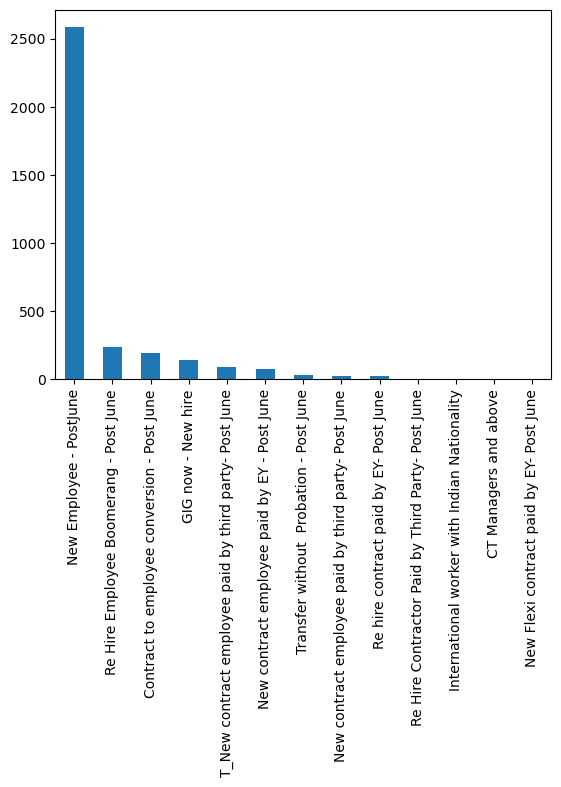

In [44]:
df['Hiretype'].value_counts().plot.bar()

In [45]:
df['Hiretype'].value_counts()

New Employee - PostJune                                   2583
Re Hire Employee Boomerang - Post June                     235
Contract to employee conversion - Post June                191
GIG now - New hire                                         144
T_New contract employee paid by third party- Post June      89
New contract employee paid by EY - Post June                80
Transfer without  Probation - Post June                     34
New contract employee paid by third party- Post June        27
Re hire contract paid by EY- Post June                      22
Re Hire Contractor Paid by Third Party- Post June            1
International worker with Indian Nationality                 1
CT Managers and above                                        1
New Flexi contract paid by EY- Post June                     1
Name: Hiretype, dtype: int64

## Columns wise description - Designation ##

In [46]:
df['Designation'].unique()

array(['Assistant Director', 'Supervising Associate', 'Analyst',
       'Associate Manager', 'Associate', 'Senior Associate',
       'Assistant Manager', 'Associate Analyst', 'Consultant',
       'Advanced Associate', 'Team Lead', 'Supervising Analyst',
       'Deputy Manager', 'Advanced Analyst', 'Manager',
       'Associate Director', 'Lead Finance Analyst', 'Lead Analyst',
       'Advanced Finance Analyst', 'Senior Finance Analyst',
       'Process Associate', 'Senior Team Lead', 'Lead Consultant',
       'Senior Manager', 'Intern',
       'Supervising Associate-Automation Central Operations',
       'Senior Analyst', 'Designer', 'Security Consultant',
       'Senior Consultant', 'Lead Executive', 'Senior Executive',
       'Automation Engineer', 'Executive', 'Project Manager'],
      dtype=object)

<AxesSubplot:>

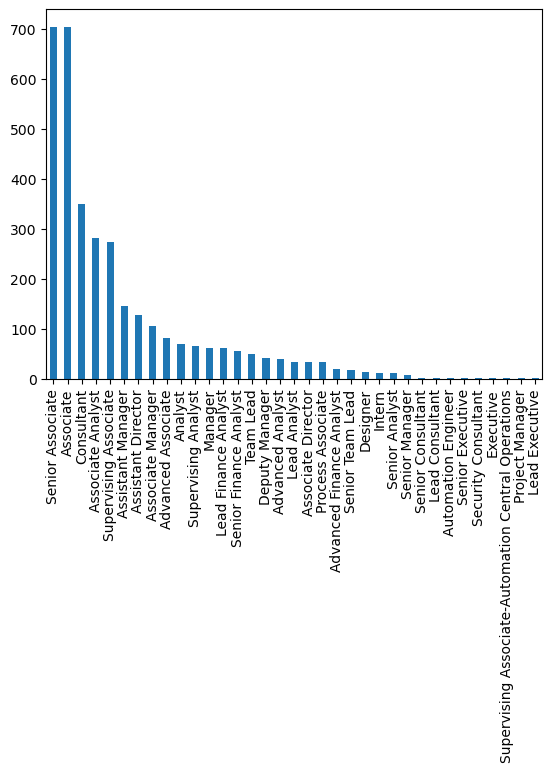

In [47]:
df['Designation'].value_counts().plot.bar()

In [48]:
df['Designation'].value_counts()

Senior Associate                                       704
Associate                                              704
Consultant                                             350
Associate Analyst                                      281
Supervising Associate                                  274
Assistant Manager                                      145
Assistant Director                                     128
Associate Manager                                      105
Advanced Associate                                      81
Analyst                                                 70
Supervising Analyst                                     65
Manager                                                 62
Lead Finance Analyst                                    62
Senior Finance Analyst                                  56
Team Lead                                               49
Deputy Manager                                          42
Advanced Analyst                                        

## Column wise description - Qualification ##

In [49]:
df['Qualification'].unique()

array(['Btech', 'B. Com', 'Bcom', 'MA English Language and Literature',
       'BCA', 'MBA', 'BA', 'PGDM', 'M.Com', 'B.Com', 'B.Sc.', 'BE',
       "Master's Degree", 'B.TECH', 'M.Sc', 'Mcom', 'BBA', 'MA', 'PGDBA',
       'Bsc', 'B.Tech', 'M.com', 'B Sc', "Bachelor's Degree", 'MCom',
       'BTech', 'BSC', 'Operations Management', 'PGDIM',
       'Masters in Computer Science and Engineering', 'BSc', 'CA', 'EE',
       'B tech', 'B.tech', 'MTech', 'BCOM',
       'Electrical and Electronics Engineering', 'MPM',
       'Majored in Sociology, with a minor in Psychology',
       'B.B.A. L.L.B. (Hons.)', 'M.Tech', 'B.Sc', 'M.Sc Computer Science',
       'LLM', 'B Tech', 'B.E', 'Masters in Public Administration',
       'B. Tech', 'M.A', 'Information Technology', 'MCA',
       'Human Resource Management', 'B.Tec', 'Bachelor Of Arts',
       'Accountancy', 'Aeronautical Engineering', 'PGDM Finance',
       'PGD International Marketing', 'B.com',
       'PG Diploma in Mass Communications & PR', 

In [50]:
df['Qualification'].value_counts()

MBA                                                                       905
B.Tech                                                                    348
BE                                                                        196
B.Com                                                                     180
PGDM                                                                      139
MCA                                                                       129
BA                                                                         95
BCA                                                                        79
Btech                                                                      79
BBA                                                                        72
M.Com                                                                      44
B.E                                                                        44
Bcom                                                            

## Column Wise Value description - Previous Employer ##

In [51]:
df['PreviousEmployer'].unique()

array(['SunTech', 'GENPACT INDIA PRIVATE LTD', 'Ernst & Young (EY)', ...,
       'KERALA STATE ELECTRICITY BOARD Ltd',
       'D Mart Avenue Supermart Ltd', 'Sparkleminds(Franchisebazar)'],
      dtype=object)

In [52]:
df['PreviousEmployer'].value_counts()

EY                                                                            103
Accenture                                                                      49
TCS                                                                            44
Tata Consultancy Services                                                      39
EY GDS                                                                         39
KPMG                                                                           36
Infosys                                                                        32
Capgemini                                                                      31
Wipro                                                                          30
Deloitte                                                                       25
Deloitte                                                                       23
Fresher                                                                        23
DXC Technology  

<AxesSubplot:>

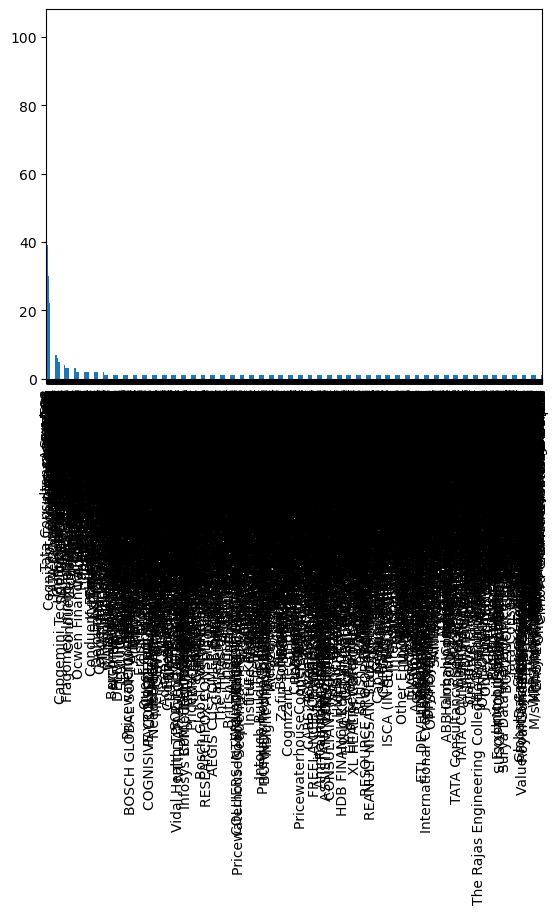

In [53]:
df['PreviousEmployer'].value_counts().plot.bar()

## Column wise value description-JoiningBonus ##

In [54]:
df['JoiningBonus'].unique()

array([    nan,      0., 150000., 100000.,  80000.,  50000., 110000.,
        60000., 265000., 350000.,  70000., 250000., 500000., 200000.,
        75000.,  35000., 370820.,  76000., 300000.,  40000.,  54325.])

In [55]:
df['JoiningBonus'] = df['JoiningBonus'].fillna(0)

In [56]:
df['JoiningBonus'].unique()

array([     0., 150000., 100000.,  80000.,  50000., 110000.,  60000.,
       265000., 350000.,  70000., 250000., 500000., 200000.,  75000.,
        35000., 370820.,  76000., 300000.,  40000.,  54325.])

In [57]:
df['JoiningBonus'].value_counts()

0.0         3319
100000.0      26
150000.0      19
50000.0       19
75000.0        5
60000.0        4
200000.0       3
70000.0        2
35000.0        1
76000.0        1
265000.0       1
300000.0       1
40000.0        1
80000.0        1
500000.0       1
54325.0        1
110000.0       1
250000.0       1
370820.0       1
350000.0       1
Name: JoiningBonus, dtype: int64

<AxesSubplot:>

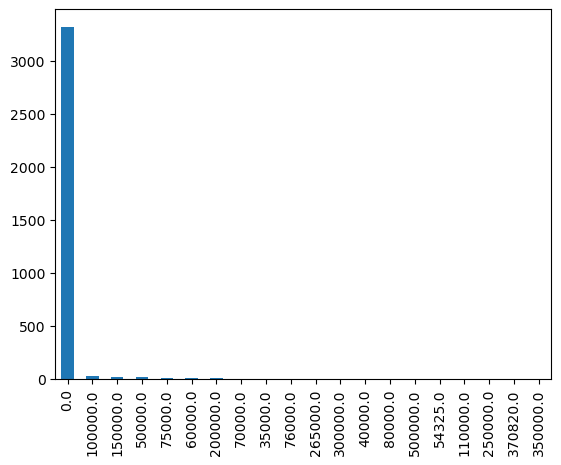

In [58]:
df['JoiningBonus'].value_counts().plot.bar()

## Previous Employer Value by big 3 ##

In [59]:
df_big_4 = df[(df['PreviousEmployer'] == 'Deloitte USI') | (df['PreviousEmployer'] =='Deloitte Consulting India Pvt Ltd')]

In [61]:
df_big_4

Empty DataFrame
Columns: [Masked ID, Hiretype, Title, Designation, NoticePeriod, Qualification, CourseCompletionYear, PreviousEmployer, JoiningBonus, GoodsTransportationTravelEligibility, IsNoticePeriodReimbursementProvided]
Index: []

In [62]:
df_big_3_Deloitte = df.loc[(df['PreviousEmployer']=='Deloitte USI') | (df['PreviousEmployer'] =='Deloitte Consulting India Pvt Ltd') | (df['PreviousEmployer'] =='Deloitte Support Services Private Limited') | (df['PreviousEmployer'] =='Deloitte Offices of the US in India')]

In [64]:
df_big_3_Deloitte

Empty DataFrame
Columns: [Masked ID, Hiretype, Title, Designation, NoticePeriod, Qualification, CourseCompletionYear, PreviousEmployer, JoiningBonus, GoodsTransportationTravelEligibility, IsNoticePeriodReimbursementProvided]
Index: []

## Big 4 wise data consideration ##

In [126]:
df_big_4 = pd.read_excel('C:/Users/JU486WK/OneDrive - EY\Desktop/Talent Hypothesis/GDS ES India_1.xlsx', sheet_name='Offer Data')

In [66]:
df_big_4['PreviousEmployer'].unique()

array(['SunTech', 'GENPACT INDIA PRIVATE LTD', 'Ernst & Young', ...,
       'KERALA STATE ELECTRICITY BOARD Ltd',
       'D Mart Avenue Supermart Ltd', 'Sparkleminds(Franchisebazar)'],
      dtype=object)

In [218]:
df_big_4['PreviousEmployer'].value_counts()

EY GDS                                                                        195
TCS                                                                           110
Infosys                                                                        97
Accenture                                                                      88
Wipro                                                                          75
KPMG                                                                           64
Cognizant                                                                      58
HCL                                                                            54
Capgemini                                                                      54
Ernst & Young                                                                  47
IBM                                                                            46
PWC                                                                            39
Deloitte        

In [68]:
df_big_4_exp = df_big_4[(df_big_4['PreviousEmployer'] == 'Deloitte') | (df_big_4['PreviousEmployer'] == 'PWC') | (df_big_4['PreviousEmployer'] =='KPMG') | (df_big_4['PreviousEmployer'] =='Ernst & Young')]

In [69]:
df_big_4_exp

Masked ID                                           Hiretype Title  \
2      ID 1002             Re Hire Employee Boomerang - Post June    Mr   
15     ID 1015        Contract to employee conversion - Post June    Ms   
17     ID 1017            Transfer without  Probation - Post June    Mr   
37     ID 1037             Re Hire Employee Boomerang - Post June    Ms   
60     ID 1061             Re hire contract paid by EY- Post June    Mr   
78      ID 108                            New Employee - PostJune    Ms   
107     ID 111             Re Hire Employee Boomerang - Post June    Mr   
164    ID 1166        Contract to employee conversion - Post June    Ms   
190    ID 1191                            New Employee - PostJune    Ms   
215    ID 1217            Transfer without  Probation - Post June    Mr   
229    ID 1230                            New Employee - PostJune    Mr   
262    ID 1261        Contract to employee conversion - Post June    Mr   
291     ID 129             Re Hire Employee Boomerang - Post June    Mr   
302    ID 1300                            New Employee - PostJune    Mr   
303    ID 1301                            New Employee - PostJune    Ms   
318    ID 1317             Re Hire Employee Boomerang - Post June    Ms   
319    ID 1318        Contract to employee conversion - Post June    Mr   
323    ID 1321             Re Hire Employee Boomerang - Post June    Mr   
335    ID 1332        Contract to employee conversion - Post June    Ms   
342    ID 1339        Contract to employee conversion - Post June    Ms   
343     ID 134                            New Employee - PostJune    Mr   
345    ID 1342                            New Employee - PostJune    Ms   
364    ID 1363                            New Employee - PostJune    Mr   
369    ID 1368        Contract to employee conversion - Post June    Ms   
372    ID 1371        Contract to employee conversion - Post June    Mr   
380     ID 138                            New Employee - PostJune    Mr   
391    ID 1391                            New Employee - PostJune    Mr   
396    ID 1396                            New Employee - PostJune    Mr   
428    ID 1432                            New Employee - PostJune    Ms   
457    ID 1460                            New Employee - PostJune    Mr   
471    ID 1476                            New Employee - PostJune    Ms   
478    ID 1482                            New Employee - PostJune    Ms   
484    ID 1488             Re Hire Employee Boomerang - Post June    Mr   
490    ID 1493                            New Employee - PostJune    Ms   
498    ID 1500                            New Employee - PostJune    Ms   
517    ID 1519                            New Employee - PostJune    Ms   
533    ID 1534                            New Employee - PostJune    Ms   
553    ID 1553                            New Employee - PostJune    Ms   
558    ID 1558                            New Employee - PostJune    Mr   
560    ID 1560             Re Hire Employee Boomerang - Post June    Mr   
562    ID 1562                            New Employee - PostJune    Ms   
563    ID 1563                            New Employee - PostJune    Mr   
597    ID 1597                            New Employee - PostJune    Ms   
637    ID 1633                            New Employee - PostJune    Ms   
646    ID 1641             Re Hire Employee Boomerang - Post June    Mr   
660    ID 1654                            New Employee - PostJune    Ms   
703    ID 1693                            New Employee - PostJune    Mr   
718    ID 1707             Re Hire Employee Boomerang - Post June    Ms   
721    ID 1710                            New Employee - PostJune    Mr   
735    ID 1724                            New Employee - PostJune    Mr   
736    ID 1725                            New Employee - PostJune    Ms   
743    ID 1731                            New Employee - PostJune    Ms   
789    ID 1776                

In [70]:
df_big_4_exp.shape

(182, 12)

In [71]:
## Checking the Center wise relocation ##
previousemployer_list = list(df_big_4_exp.PreviousEmployer.unique())
previousemployer_list

['Ernst & Young', 'KPMG', 'Deloitte', 'PWC']

## Designation wise  Big 4 distribution ##

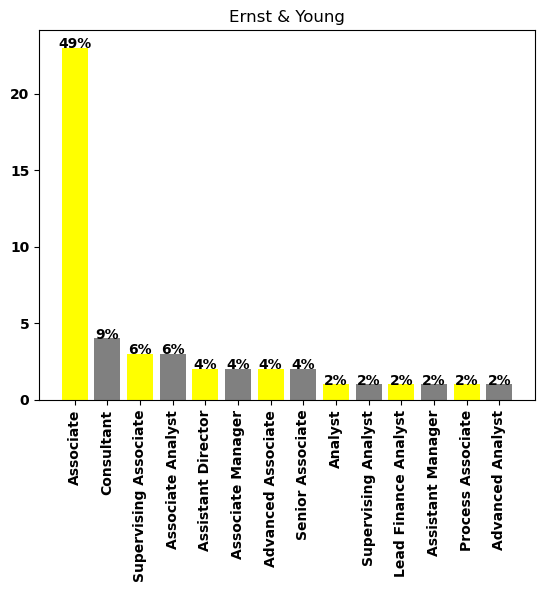

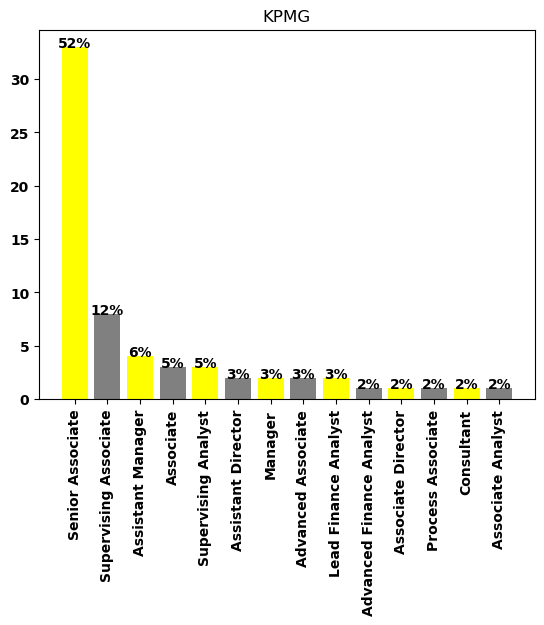

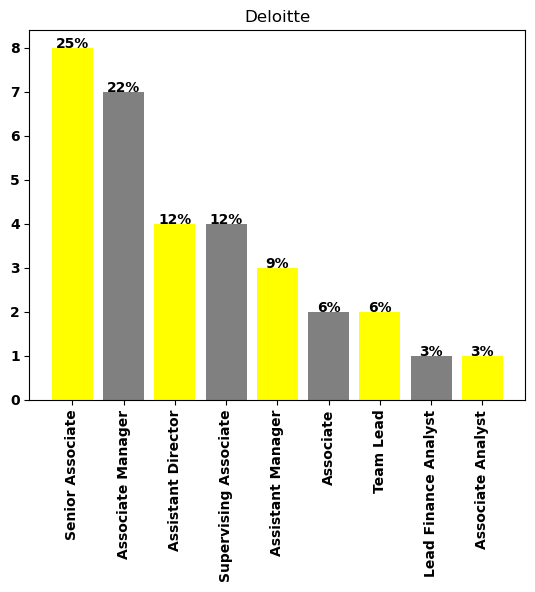

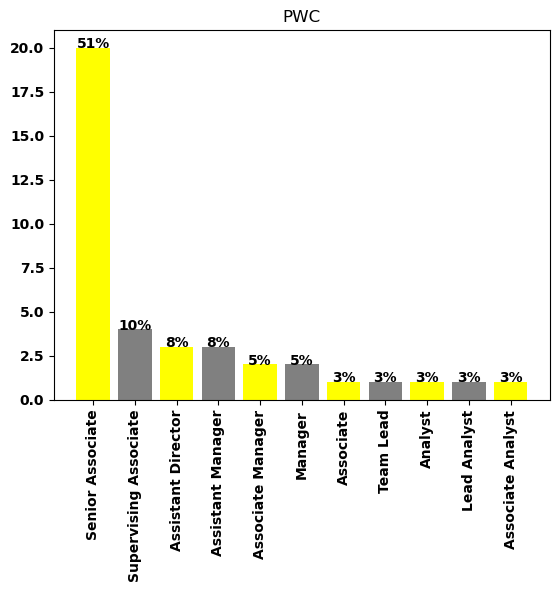

[20, 4, 3, 3, 2, 2, 1, 1, 1, 1, 1]

In [72]:
import matplotlib.pyplot as plt
plt.rcParams["font.weight"] = "bold"

for employerlist in previousemployer_list:
    temp_df = df_big_4_exp[df_big_4_exp['PreviousEmployer'] == employerlist]
    val = temp_df['Designation'].value_counts()
    designation_names = list(val.index)
    designation_count = list(val.values)
    #name = ["Gurgaon"]
    
    color_list = []
    for i in range(0,len(designation_names),2):
        color_list.append("Yellow")
        if i+1 != len(designation_names):
            color_list.append("gray")
    barchart = plt.bar(designation_names, designation_count, color = color_list)
    #plt.bar(name, city_count)
    for bc, name in zip(barchart, designation_names):
        dt1 = df_big_4_exp[df_big_4_exp['PreviousEmployer']==employerlist]
        dt2 = dt1[dt1['Designation']==name] #'Uttar Pradesh']
        percentage = len(dt2)/len(dt1)  
        width = bc.get_width()
        height = bc.get_height()
        x, y = bc.get_xy()
        plt.text(x + width/2, y + height * 1, str(round(percentage* 100)) + '%', ha='center')
    plt.xticks(rotation=90)
    plt.title(employerlist)
    plt.show()
designation_count

## Big 4 wise data consideration ##

In [73]:
df_big_4 = pd.read_excel('C:/Users/JU486WK/OneDrive - EY\Desktop/Talent Hypothesis/GDS ES India_1.xlsx', sheet_name='Offer Data')

In [74]:
df_big_4.head(10)

Masked ID                                Hiretype Title  \
0   ID 1000  Re Hire Employee Boomerang - Post June    Mr   
1   ID 1001                 New Employee - PostJune    Mr   
2   ID 1002  Re Hire Employee Boomerang - Post June    Mr   
3   ID 1003                 New Employee - PostJune    Mr   
4   ID 1004                 New Employee - PostJune    Mr   
5   ID 1005                 New Employee - PostJune    Ms   
6   ID 1006                 New Employee - PostJune    Mr   
7   ID 1007                 New Employee - PostJune    Ms   
8   ID 1008                 New Employee - PostJune    Mr   
9   ID 1009                 New Employee - PostJune    Ms   

             Designation  NoticePeriod                       Qualification  \
0     Assistant Director           3.0                               Btech   
1  Supervising Associate           2.0                              B. Com   
2                Analyst           2.0                                Bcom   
3      Associate Manager           2.0  MA English Language and Literature   
4  Supervising Associate           2.0                                 BCA   
5      Associate Manager           2.0                                 MBA   
6      Associate Manager           2.0                                  BA   
7              Associate           2.0                                PGDM   
8       Senior Associate           2.0                               Btech   
9              Associate           2.0                                 MBA   

  CourseCompletionYear           PreviousEmployer  JoiningBonus  \
0           23-06-2009                    SunTech           NaN   
1           31-07-2008  GENPACT INDIA PRIVATE LTD           NaN   
2           30-06-2016              Ernst & Young           NaN   
3           29-06-2012                     Amdocs           NaN   
4           30-06-2011                        TCS           NaN   
5           30-06-2008                        HCL           NaN   
6           30-06-2008             MMI Online Ltd           NaN   
7           21-06-2016                 Intertrust           NaN   
8           16-06-2015                        NaN           NaN   
9           30-06-2017  MACFAST College Tiruvalla           NaN   

                GoodsTransportationTravelEligibility  \
0  Not applicable / Not Eligible for relocation b...   
1  Not applicable / Not Eligible for relocation b...   
2  Not applicable / Not Eligible for relocation b...   
3                   Eligible for Domestic Relocation   
4  Not applicable / Not Eligible for relocation b...   
5  Not applicable / Not Eligible for relocation b...   
6  Not applicable / Not Eligible for relocation b...   
7  Not applicable / Not Eligible for relocation b...   
8  Not applicable / Not Eligible for relocation b...   
9  Not applicable / Not Eligible for relocation b...   

  IsNoticePeriodReimbursementProvided  Rank  
0                                True    66  
1                                True    64  
2                               False    65  
3                               False    66  
4                                True    65  
5                               False    63  
6                               False    62  
7                               False    66  
8                               False    64  
9                               False    66

In [75]:
df_big_4_exp = df_big_4[(df_big_4['PreviousEmployer'] == 'Deloitte') | (df_big_4['PreviousEmployer'] == 'PWC') | (df_big_4['PreviousEmployer'] =='KPMG') | (df_big_4['PreviousEmployer'] =='Ernst & Young') | (df_big_4['PreviousEmployer'] =='EY GDS')] 

In [127]:
df_big_4_exp

Masked ID                                           Hiretype Title  \
2      ID 1002             Re Hire Employee Boomerang - Post June    Mr   
15     ID 1015        Contract to employee conversion - Post June    Ms   
17     ID 1017            Transfer without  Probation - Post June    Mr   
32     ID 1032        Contract to employee conversion - Post June    Ms   
35     ID 1035        Contract to employee conversion - Post June    Mr   
37     ID 1037             Re Hire Employee Boomerang - Post June    Ms   
41     ID 1042            Transfer without  Probation - Post June    Mr   
47      ID 105             Re Hire Employee Boomerang - Post June    Mr   
56     ID 1058             Re hire contract paid by EY- Post June    Ms   
59     ID 1060             Re hire contract paid by EY- Post June    Ms   
60     ID 1061             Re hire contract paid by EY- Post June    Mr   
62     ID 1063             Re hire contract paid by EY- Post June    Mr   
65     ID 1066             Re Hire Employee Boomerang - Post June    Mr   
78      ID 108                            New Employee - PostJune    Ms   
81     ID 1082            Transfer without  Probation - Post June    Mr   
83     ID 1084            Transfer without  Probation - Post June    Ms   
85     ID 1086             Re Hire Employee Boomerang - Post June    Ms   
106    ID 1109             Re Hire Employee Boomerang - Post June    Ms   
107     ID 111             Re Hire Employee Boomerang - Post June    Mr   
108    ID 1110        Contract to employee conversion - Post June    Ms   
128    ID 1131            Transfer without  Probation - Post June    Ms   
130    ID 1133            Transfer without  Probation - Post June    Mr   
133    ID 1136            Transfer without  Probation - Post June    Ms   
164    ID 1166        Contract to employee conversion - Post June    Ms   
174    ID 1177        Contract to employee conversion - Post June    Mr   
175    ID 1178        Contract to employee conversion - Post June    Mr   
186    ID 1188             Re Hire Employee Boomerang - Post June    Ms   
187    ID 1189             Re Hire Employee Boomerang - Post June    Ms   
190    ID 1191                            New Employee - PostJune    Ms   
202    ID 1203        Contract to employee conversion - Post June    Ms   
215    ID 1217            Transfer without  Probation - Post June    Mr   
223    ID 1225        Contract to employee conversion - Post June    Mr   
224    ID 1226        Contract to employee conversion - Post June    Ms   
229    ID 1230                            New Employee - PostJune    Mr   
237    ID 1238             Re hire contract paid by EY- Post June    Mr   
254    ID 1254        Contract to employee conversion - Post June    Ms   
260     ID 126        Contract to employee conversion - Post June    Mr   
261    ID 1260        Contract to employee conversion - Post June    Ms   
262    ID 1261        Contract to employee conversion - Post June    Mr   
264    ID 1263  T_New contract employee paid by third party- P...    Ms   
274    ID 1273            Transfer without  Probation - Post June    Ms   
275    ID 1274        Contract to employee conversion - Post June    Mr   
290    ID 1289             Re Hire Employee Boomerang - Post June    Mr   
291     ID 129             Re Hire Employee Boomerang - Post June    Mr   
296    ID 1294        Contract to employee conversion - Post June    Ms   
302    ID 1300                            New Employee - PostJune    Mr   
303    ID 1301                            New Employee - PostJune    Ms   
318    ID 1317             Re Hire Employee Boomerang - Post June    Ms   
319    ID 1318        Contract to employee conversion - Post June    Mr   
320    ID 1319             Re Hire Employee Boomerang - Post June    Ms   
323    ID 1321             Re Hire Employee Boomerang - Post June    Mr   
331    ID 1329        Contract to employee conversion - Post June    Ms   
334    ID 1331        Contract

In [219]:
df_big_4_exp['PreviousEmployer'].value_counts()

KPMG             64
Ernst & Young    47
PWC              39
Deloitte         32
Name: PreviousEmployer, dtype: int64

In [128]:
## Checking the employer  wise relocation ##
previousemployer_list = list(df_big_4_exp.PreviousEmployer.unique())
previousemployer_list

['Ernst & Young', 'EY GDS', 'KPMG', 'Deloitte', 'PWC']

##  Rank wise Big 4 distribution ##

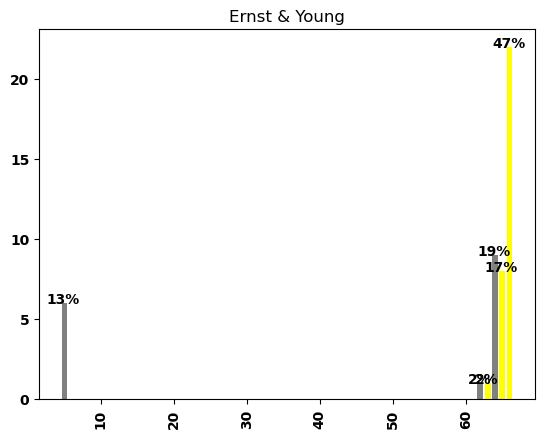

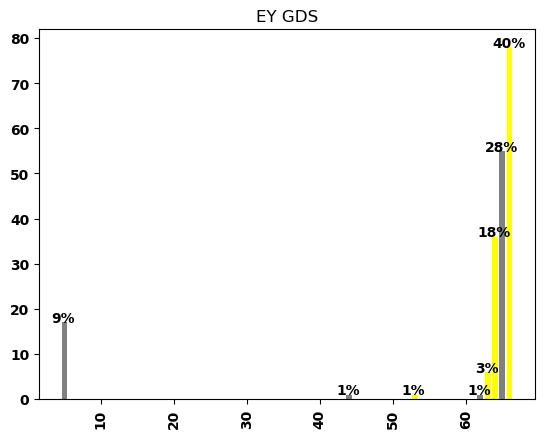

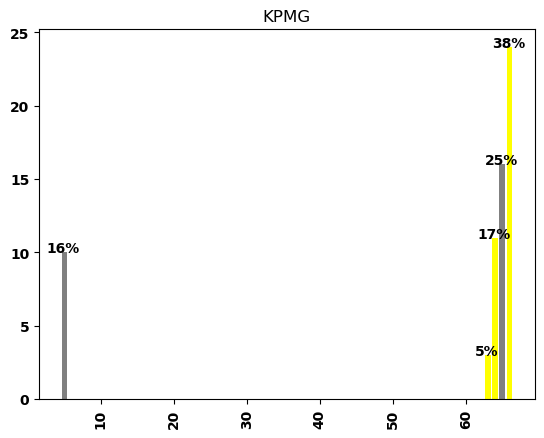

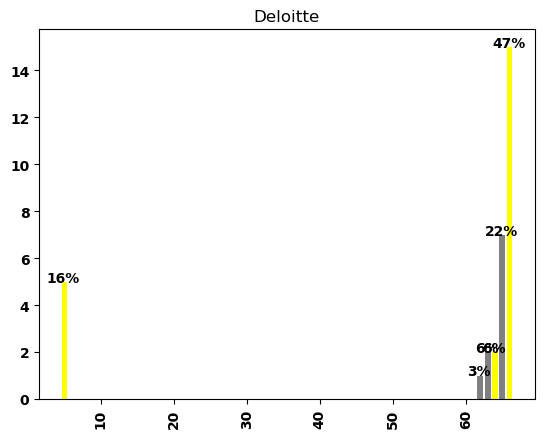

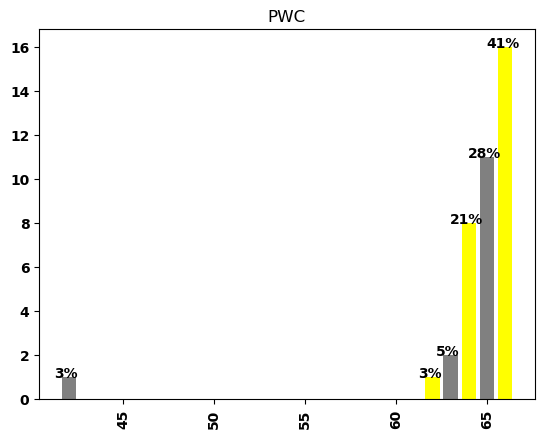

[16, 11, 8, 2, 1, 1]

In [92]:

for employerlist in previousemployer_list:
    temp_df = df_big_4_exp[df_big_4_exp['PreviousEmployer'] == employerlist]
    val = temp_df['Rank'].value_counts()
    rank_names = list(val.index)
    rank_count = list(val.values)
    #name = ["Gurgaon"]
    color_list = []
    for i in range(0,len(rank_names),2):
        color_list.append("Yellow")
        if i+1 != len(rank_names):
            color_list.append("gray")
    barchart = plt.bar(rank_names, rank_count, color = color_list)
    #plt.bar(name, city_count)
    for bc, name in zip(barchart, rank_names):
        dt1 = df_big_4_exp[df_big_4_exp['PreviousEmployer']==employerlist]
        dt2 = dt1[dt1['Rank']==name] #'Uttar Pradesh']
        percentage = len(dt2)/len(dt1)  
        width = bc.get_width()
        height = bc.get_height()
        x, y = bc.get_xy()
        plt.text(x + width/3, y + height * 1, str(round(percentage* 100)) + '%', ha='center')
    plt.xticks(rotation=90)
    plt.title(employerlist)
    plt.show()
rank_count

##  Rank wise service based indian organization distribution ##

In [93]:
df_service_exp = df_big_4[(df_big_4['PreviousEmployer'] == 'TCS') | (df_big_4['PreviousEmployer'] == 'Infosys') | (df_big_4['PreviousEmployer'] =='Wipro') | (df_big_4['PreviousEmployer'] =='HCL') | (df_big_4['PreviousEmployer'] =='Tech mahindra')] 

In [94]:
df_service_exp

Masked ID                                           Hiretype Title  \
4      ID 1004                            New Employee - PostJune    Mr   
5      ID 1005                            New Employee - PostJune    Ms   
29      ID 103                            New Employee - PostJune    Mr   
30     ID 1030                            New Employee - PostJune    Ms   
31     ID 1031       New contract employee paid by EY - Post June    Ms   
54     ID 1056                            New Employee - PostJune    Ms   
70     ID 1072                            New Employee - PostJune    Mr   
77     ID 1079             Re Hire Employee Boomerang - Post June    Mr   
79     ID 1080                            New Employee - PostJune    Mr   
91     ID 1092                            New Employee - PostJune    Mr   
98     ID 1099             Re Hire Employee Boomerang - Post June    Mr   
102    ID 1105                            New Employee - PostJune    Mr   
121    ID 1123             Re Hire Employee Boomerang - Post June    Mr   
148    ID 1150                            New Employee - PostJune    Mr   
161    ID 1163                            New Employee - PostJune    Mr   
166    ID 1168             Re Hire Employee Boomerang - Post June    Mr   
178    ID 1180                            New Employee - PostJune    Mr   
179    ID 1181                            New Employee - PostJune    Ms   
189    ID 1190                            New Employee - PostJune    Ms   
192    ID 1193             Re Hire Employee Boomerang - Post June    Ms   
194    ID 1196                            New Employee - PostJune    Mr   
213    ID 1215                            New Employee - PostJune    Mr   
217    ID 1219                            New Employee - PostJune    Mr   
263    ID 1262                            New Employee - PostJune    Ms   
265    ID 1264                            New Employee - PostJune    Mr   
273    ID 1272                            New Employee - PostJune    Mr   
280    ID 1279                            New Employee - PostJune    Ms   
283    ID 1282             Re Hire Employee Boomerang - Post June    Mr   
287    ID 1286             Re Hire Employee Boomerang - Post June    Ms   
292    ID 1290                            New Employee - PostJune    Ms   
317    ID 1316                            New Employee - PostJune    Mr   
322    ID 1320                            New Employee - PostJune    Ms   
330    ID 1328             Re Hire Employee Boomerang - Post June    Mr   
332     ID 133             Re Hire Employee Boomerang - Post June    Mr   
346    ID 1343                            New Employee - PostJune    Ms   
363    ID 1362             Re Hire Employee Boomerang - Post June    Mr   
376    ID 1375                            New Employee - PostJune    Mr   
400    ID 1400                            New Employee - PostJune    Ms   
402    ID 1402                            New Employee - PostJune    Ms   
403    ID 1403                            New Employee - PostJune    Mr   
404    ID 1404                            New Employee - PostJune    Mr   
417    ID 1420             Re Hire Employee Boomerang - Post June    Mr   
418    ID 1421                            New Employee - PostJune    Mr   
423    ID 1427                            New Employee - PostJune    Ms   
431    ID 1435                            New Employee - PostJune    Mr   
432    ID 1436                            New Employee - PostJune    Ms   
437    ID 1441                            New Employee - PostJune    Ms   
438    ID 1442                            New Employee - PostJune    Mr   
439    ID 1443             Re Hire Employee Boomerang - Post June    Mr   
450    ID 1454             Re Hire Employee Boomerang - Post June    Mr   
452    ID 1456                            New Employee - PostJune    Mr   
455    ID 1459                            New Employee - PostJune    Mr   
459    ID 1462                

In [95]:
## Checking the employer  wise relocation ##
previousemployer_list = list(df_service_exp.PreviousEmployer.unique())
previousemployer_list

['TCS', 'HCL', 'Wipro', 'Tech mahindra', 'Infosys']

## Designation wise service based distribution ##

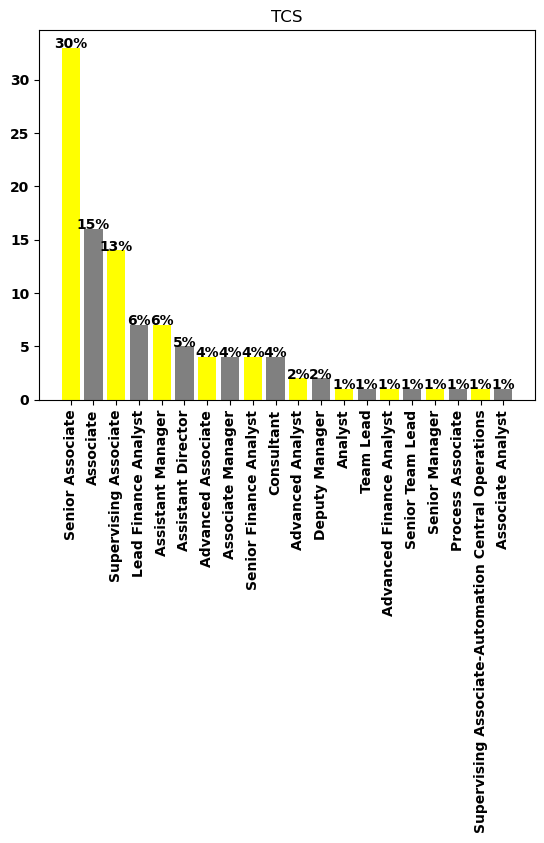

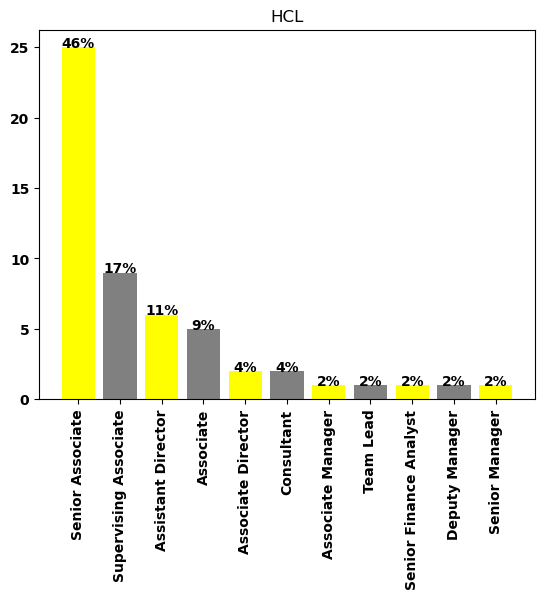

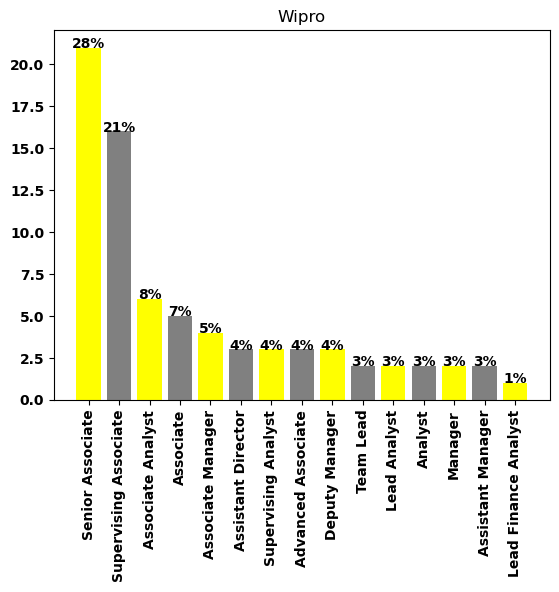

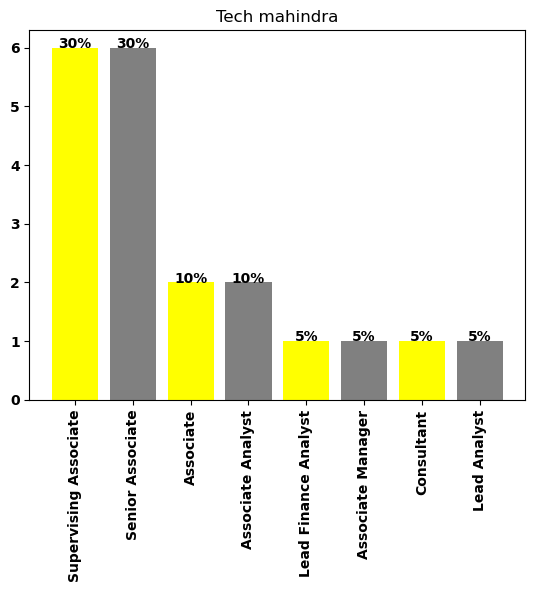

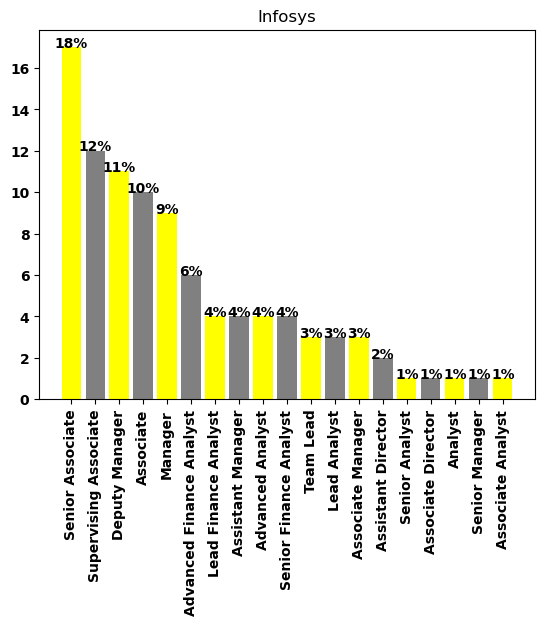

[17, 12, 11, 10, 9, 6, 4, 4, 4, 4, 3, 3, 3, 2, 1, 1, 1, 1, 1]

In [96]:
import matplotlib.pyplot as plt
plt.rcParams["font.weight"] = "bold"

for employerlist in previousemployer_list:
    temp_df = df_service_exp[df_service_exp['PreviousEmployer'] == employerlist]
    val = temp_df['Designation'].value_counts()
    designation_names = list(val.index)
    designation_count = list(val.values)
    #name = ["Gurgaon"]
    
    color_list = []
    for i in range(0,len(designation_names),2):
        color_list.append("Yellow")
        if i+1 != len(designation_names):
            color_list.append("gray")
    barchart = plt.bar(designation_names, designation_count, color = color_list)
    #plt.bar(name, city_count)
    for bc, name in zip(barchart, designation_names):
        dt1 = df_service_exp[df_service_exp['PreviousEmployer']==employerlist]
        dt2 = dt1[dt1['Designation']==name] #'Uttar Pradesh']
        percentage = len(dt2)/len(dt1)  
        width = bc.get_width()
        height = bc.get_height()
        x, y = bc.get_xy()
        plt.text(x + width/2, y + height * 1, str(round(percentage* 100)) + '%', ha='center')
    plt.xticks(rotation=90)
    plt.title(employerlist)
    plt.show()
designation_count

## Rank Wise Service based organization ##

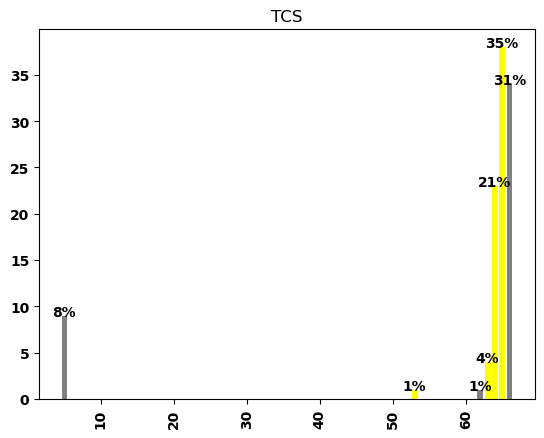

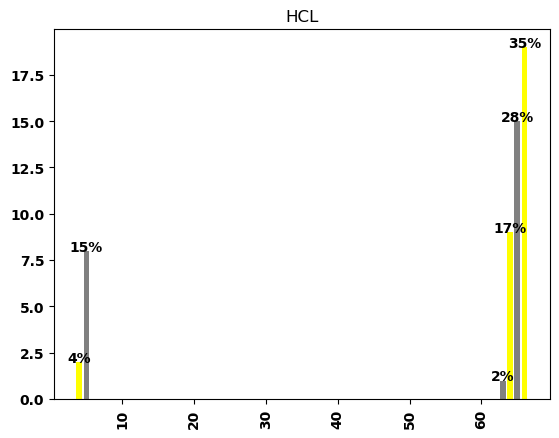

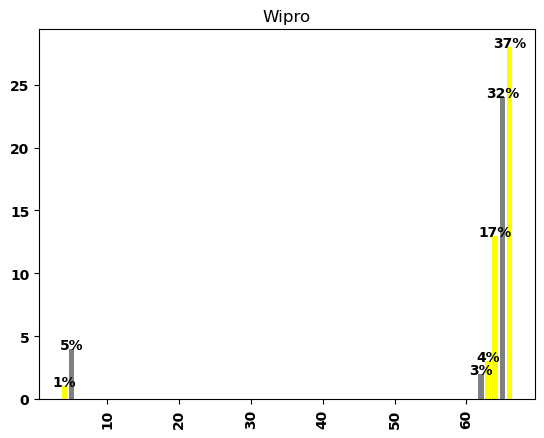

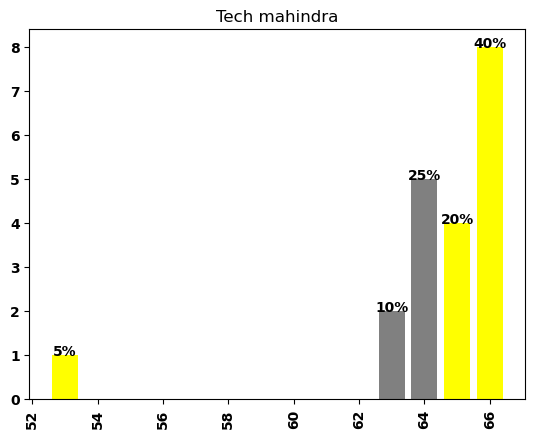

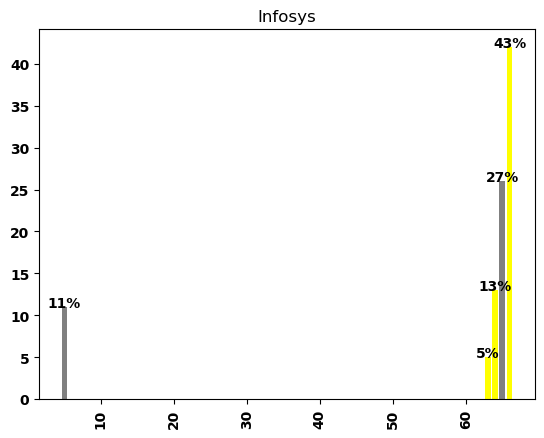

[42, 26, 13, 11, 5]

In [97]:
import matplotlib.pyplot as plt
plt.rcParams["font.weight"] = "bold"

for employerlist in previousemployer_list:
    temp_df = df_service_exp[df_service_exp['PreviousEmployer'] == employerlist]
    val = temp_df['Rank'].value_counts()
    rank_names = list(val.index)
    rank_count = list(val.values)
    #name = ["Gurgaon"]
    
    color_list = []
    for i in range(0,len(rank_names),2):
        color_list.append("Yellow")
        if i+1 != len(rank_names):
            color_list.append("gray")
    barchart = plt.bar(rank_names, rank_count, color = color_list)
    #plt.bar(name, city_count)
    for bc, name in zip(barchart, rank_names):
        dt1 = df_service_exp[df_service_exp['PreviousEmployer']==employerlist]
        dt2 = dt1[dt1['Rank']==name] #'Uttar Pradesh']
        percentage = len(dt2)/len(dt1)  
        width = bc.get_width()
        height = bc.get_height()
        x, y = bc.get_xy()
        plt.text(x + width/2, y + height * 1, str(round(percentage* 100)) + '%', ha='center')
    plt.xticks(rotation=90)
    plt.title(employerlist)
    plt.show()
rank_count

##  Rank wise consultants  organization distribution ##

In [98]:
df_consultants_exp = df_big_4[(df_big_4['PreviousEmployer'] == 'Accenture') | (df_big_4['PreviousEmployer'] == 'Capgemini') | (df_big_4['PreviousEmployer'] =='DXC') | (df_big_4['PreviousEmployer'] == 'IBM') | (df_big_4['PreviousEmployer'] =='Kyndryl')] 

In [99]:
df_consultants_exp

Masked ID                                           Hiretype Title  \
43     ID 1044                            New Employee - PostJune    Ms   
72     ID 1074                            New Employee - PostJune    Mr   
76     ID 1078                            New Employee - PostJune    Mr   
135    ID 1138                            New Employee - PostJune    Ms   
162    ID 1164                            New Employee - PostJune    Mr   
172    ID 1174                            New Employee - PostJune    Mr   
180    ID 1182                            New Employee - PostJune    Ms   
198     ID 120                            New Employee - PostJune    Ms   
230    ID 1231                            New Employee - PostJune    Mr   
238    ID 1239                            New Employee - PostJune    Mr   
256    ID 1256                            New Employee - PostJune    Mr   
257    ID 1257             Re Hire Employee Boomerang - Post June    Mr   
289    ID 1288                            New Employee - PostJune    Ms   
358    ID 1356                            New Employee - PostJune    Mr   
362    ID 1361                            New Employee - PostJune    Mr   
371    ID 1370                            New Employee - PostJune    Mr   
378    ID 1377                            New Employee - PostJune    Mr   
394    ID 1394                            New Employee - PostJune    Mr   
399    ID 1399                            New Employee - PostJune    Mr   
406    ID 1406                            New Employee - PostJune    Ms   
407    ID 1408                            New Employee - PostJune    Mr   
445    ID 1449                            New Employee - PostJune    Ms   
447    ID 1451                            New Employee - PostJune    Ms   
454    ID 1458                            New Employee - PostJune    Mr   
557    ID 1557                            New Employee - PostJune    Mr   
568    ID 1568                            New Employee - PostJune    Ms   
604    ID 1603                            New Employee - PostJune    Ms   
607    ID 1606                            New Employee - PostJune    Ms   
615    ID 1613                            New Employee - PostJune    Ms   
616    ID 1614                            New Employee - PostJune    Ms   
626    ID 1623                            New Employee - PostJune    Ms   
638    ID 1634                            New Employee - PostJune    Ms   
681    ID 1673                            New Employee - PostJune    Ms   
699     ID 169                            New Employee - PostJune    Ms   
769    ID 1758                                 GIG now - New hire    Ms   
771     ID 176                            New Employee - PostJune    Ms   
810    ID 1795                            New Employee - PostJune    Ms   
846     ID 183                            New Employee - PostJune    Ms   
877    ID 1858                            New Employee - PostJune    Mr   
881    ID 1861                            New Employee - PostJune    Mr   
908    ID 1886                            New Employee - PostJune    Mr   
941    ID 1916                            New Employee - PostJune    Ms   
944    ID 1919                            New Employee - PostJune    Mr   
967    ID 1940                            New Employee - PostJune    Ms   
969    ID 1942                            New Employee - PostJune    Ms   
974    ID 1947                            New Employee - PostJune    Mr   
987    ID 1959                            New Employee - PostJune    Ms   
1002   ID 1973                            New Employee - PostJune    Mr   
1004   ID 1975                            New Employee - PostJune    Mr   
1025   ID 1995                            New Employee - PostJune    Ms   
1041   ID 2010                            New Employee - PostJune    Mr   
1053   ID 2022             Re Hire Employee Boomerang - Post June    Mr   
1100   ID 2067                

In [102]:
## Checking the employer  wise relocation ##
previousemployer_list = list(df_consultants_exp.PreviousEmployer.unique())
previousemployer_list

['Accenture', 'IBM', 'Capgemini']

## Designation wise distribution ##

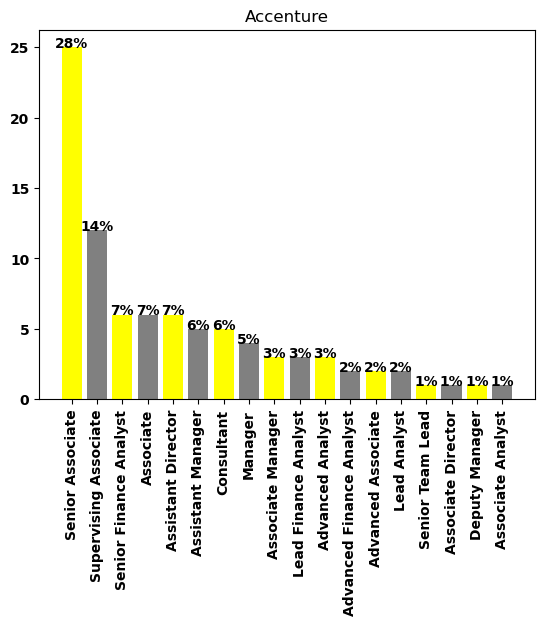

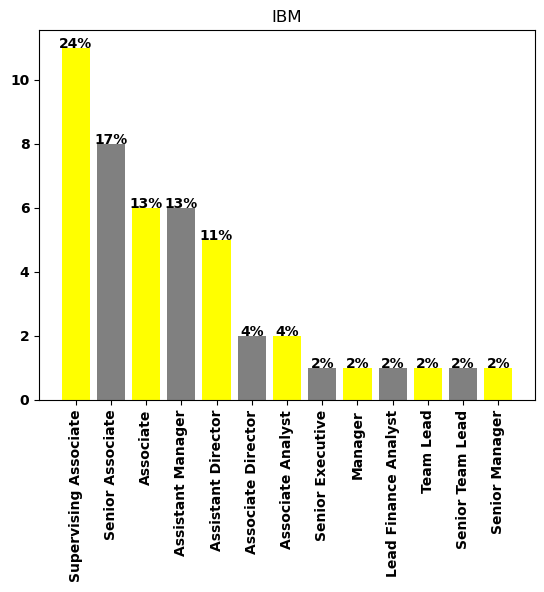

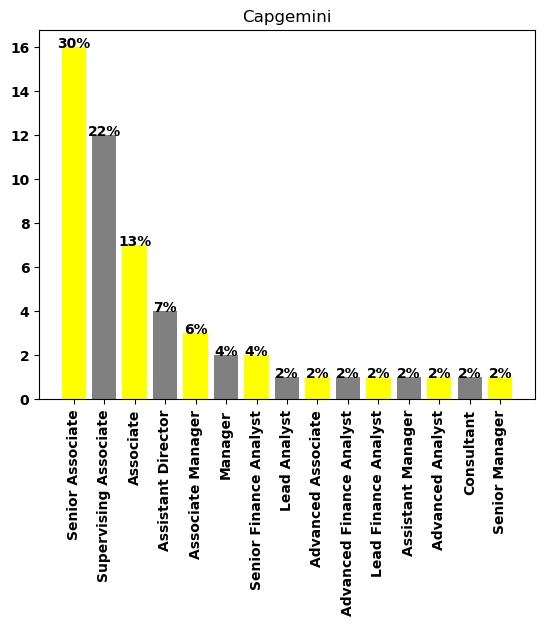

[16, 12, 7, 4, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1]

In [103]:
import matplotlib.pyplot as plt
plt.rcParams["font.weight"] = "bold"

for employerlist in previousemployer_list:
    temp_df = df_consultants_exp[df_consultants_exp['PreviousEmployer'] ==employerlist]
    val = temp_df['Designation'].value_counts()
    designation_names = list(val.index)
    designation_count = list(val.values)
    #name = ["Gurgaon"]
    
    color_list = []
    for i in range(0,len(designation_names),2):
        color_list.append("Yellow")
        if i+1 != len(designation_names):
            color_list.append("gray")
    barchart = plt.bar(designation_names, designation_count, color = color_list)
    #plt.bar(name, city_count)
    for bc, name in zip(barchart, designation_names):
        dt1 = df_consultants_exp[df_consultants_exp['PreviousEmployer']==employerlist]
        dt2 = dt1[dt1['Designation']==name] #'Uttar Pradesh']
        percentage = len(dt2)/len(dt1)  
        width = bc.get_width()
        height = bc.get_height()
        x, y = bc.get_xy()
        plt.text(x + width/2, y + height * 1, str(round(percentage* 100)) + '%', ha='center')
    plt.xticks(rotation=90)
    plt.title(employerlist)
    plt.show()
designation_count

## Rank wise distribution ##

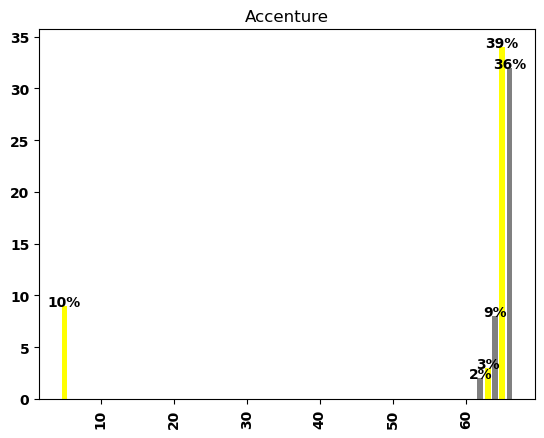

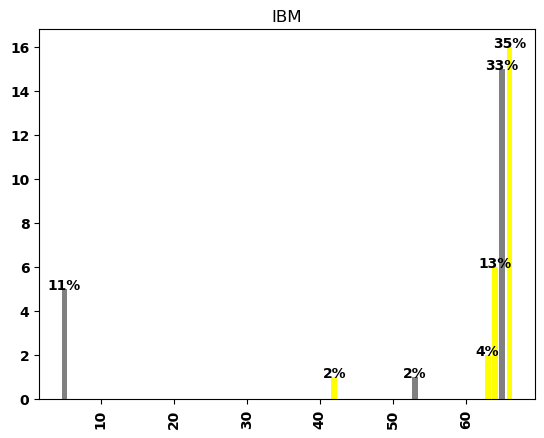

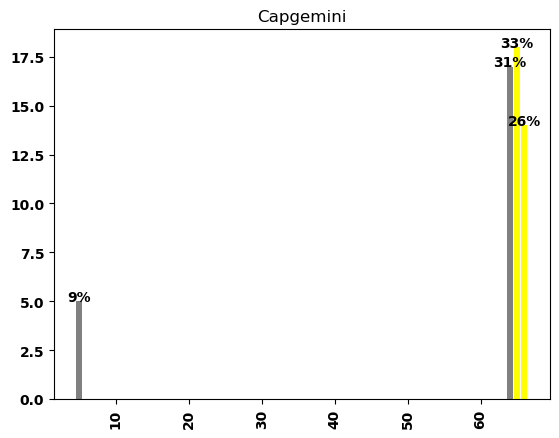

[18, 17, 14, 5]

In [105]:
import matplotlib.pyplot as plt
plt.rcParams["font.weight"] = "bold"

for employerlist in previousemployer_list:
    temp_df = df_consultants_exp[df_consultants_exp['PreviousEmployer'] == employerlist]
    val = temp_df['Rank'].value_counts()
    rank_names = list(val.index)
    rank_count = list(val.values)
    #name = ["Gurgaon"]
    
    color_list = []
    for i in range(0,len(rank_names),2):
        color_list.append("Yellow")
        if i+1 != len(rank_names):
            color_list.append("gray")
    barchart = plt.bar(rank_names, rank_count, color = color_list)
    #plt.bar(name, city_count)
    for bc, name in zip(barchart, rank_names):
        dt1 = df_consultants_exp[df_consultants_exp['PreviousEmployer']==employerlist]
        dt2 = dt1[dt1['Rank']==name] #'Uttar Pradesh']
        percentage = len(dt2)/len(dt1)  
        width = bc.get_width()
        height = bc.get_height()
        x, y = bc.get_xy()
        plt.text(x + width/2, y + height * 1, str(round(percentage* 100)) + '%', ha='center')
    plt.xticks(rotation=90)
    plt.title(employerlist)
    plt.show()
rank_count

## Previous Employer and Hiretype distribution ##

In [106]:
df_big_4 = df[(df['PreviousEmployer'] == 'Deloitte') | (df['PreviousEmployer'] == 'PWC') | (df['PreviousEmployer'] =='KPMG') | (df['PreviousEmployer'] =='Ernst & Young') | (df['PreviousEmployer'] =='EY GDS')] 

In [107]:
## Checking the Center wise relocation ##
employer_list = list(df_big_4.PreviousEmployer.unique())
employer_list

['EY GDS', 'Ernst & Young', 'KPMG', 'Deloitte', 'PWC']

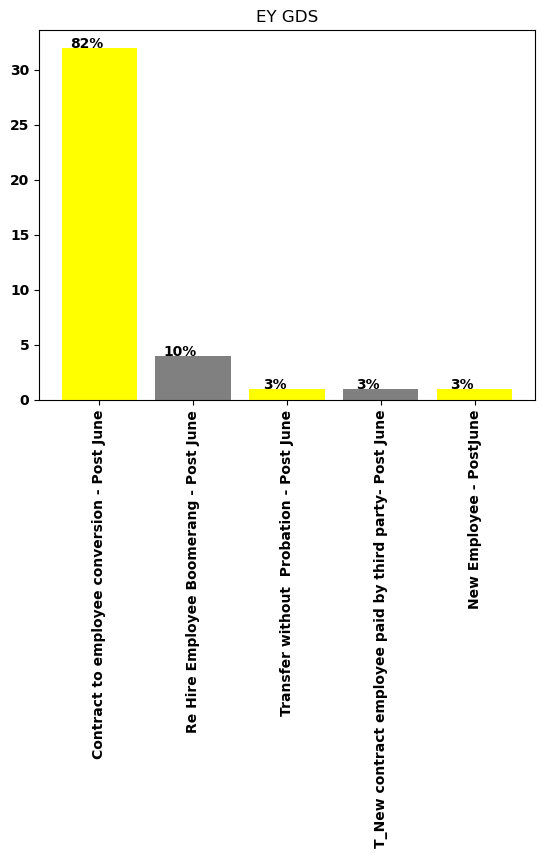

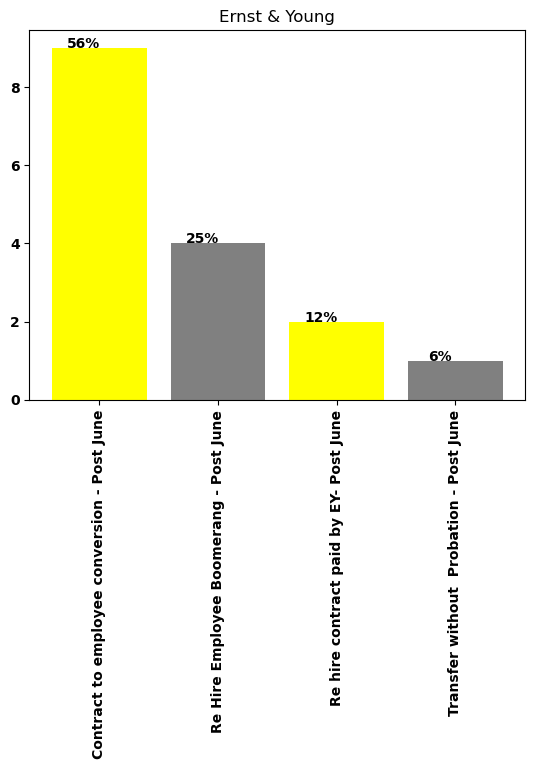

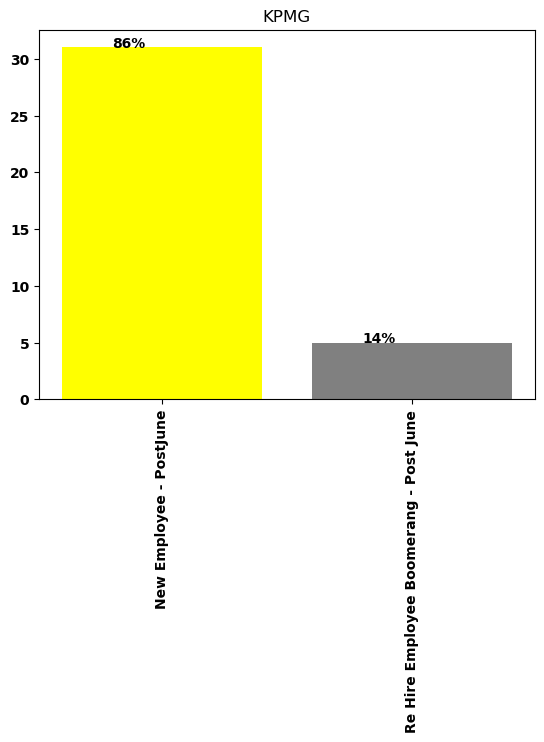

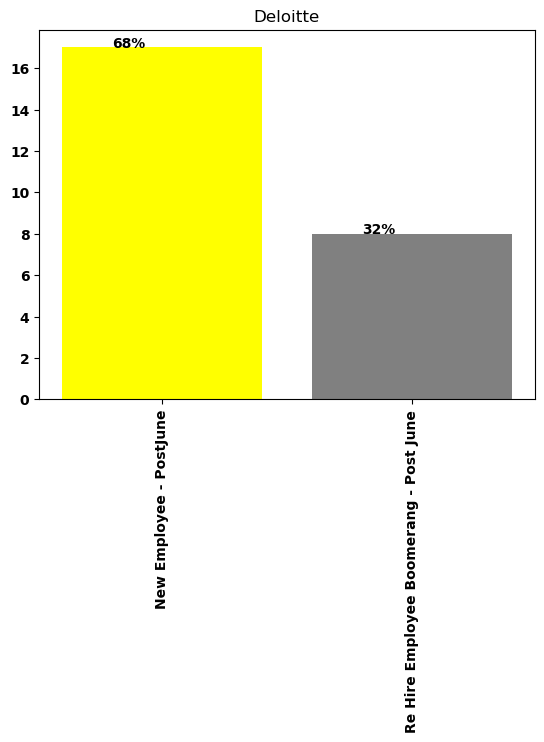

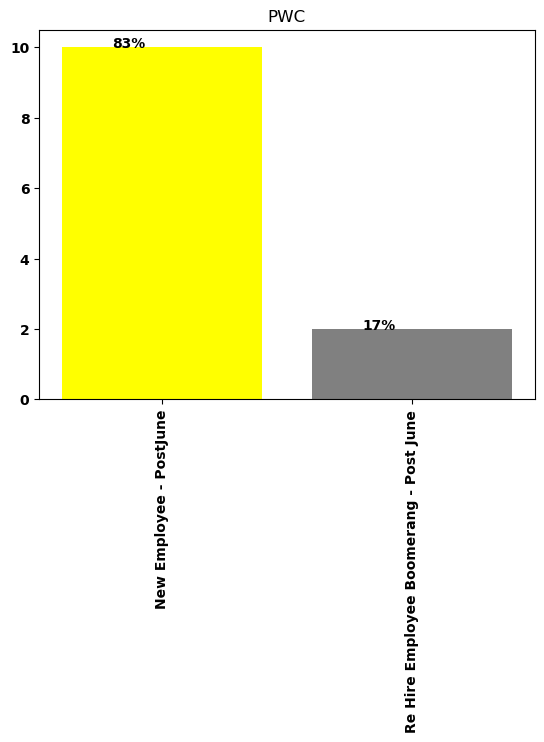

[10, 2]

In [108]:
for employerlist in employer_list:
    temp_df = df_big_4[df_big_4['PreviousEmployer'] == employerlist]
    val = temp_df['Hiretype'].value_counts()
    hiretype_names = list(val.index)
    hiretype_count = list(val.values)
    #name = ["Gurgaon"]
    color_list = []
    for i in range(0,len(hiretype_names),2):
        color_list.append("Yellow")
        if i+1 != len(hiretype_names):
            color_list.append("gray")
    barchart = plt.bar(hiretype_names, hiretype_count, color = color_list)
    #plt.bar(name, city_count)
    for bc, name in zip(barchart, hiretype_names):
        dt1 = df_big_4[df_big_4['PreviousEmployer']== employerlist]
        dt2 = dt1[dt1['Hiretype']==name] #'Uttar Pradesh']
        percentage = len(dt2)/len(dt1)  
        width = bc.get_width()
        height = bc.get_height()
        x, y = bc.get_xy()
        plt.text(x + width/3, y + height * 1, str(round(percentage* 100)) + '%', ha='center')
    plt.xticks(rotation=90)
    plt.title(employerlist)
    plt.show()
hiretype_count

In [109]:
df_service_exp = df[(df['PreviousEmployer'] == 'TCS') | (df['PreviousEmployer'] == 'Infosys') | (df['PreviousEmployer'] =='Wipro') | (df['PreviousEmployer'] =='HCL') | (df['PreviousEmployer'] =='Tech mahindra')] 

In [110]:
## Checking the Center wise relocation ##
employer_list = list(df_service_exp.PreviousEmployer.unique())
employer_list

['TCS', 'HCL', 'Wipro', 'Infosys', 'Tech mahindra']

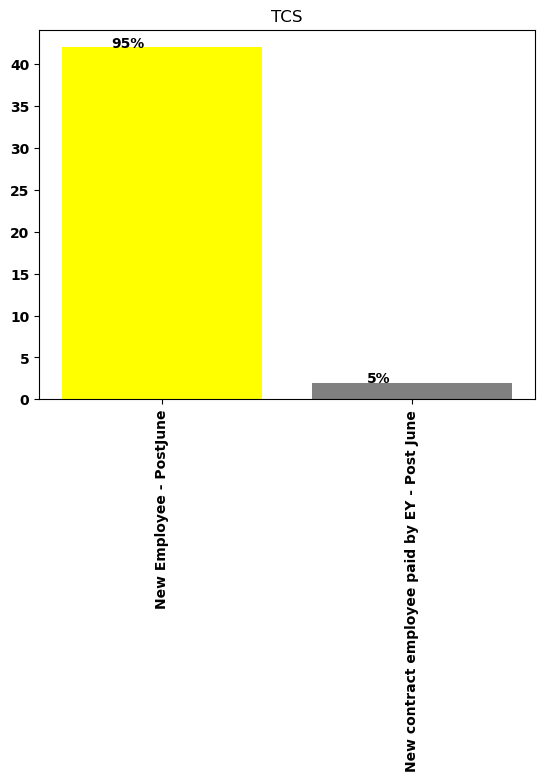

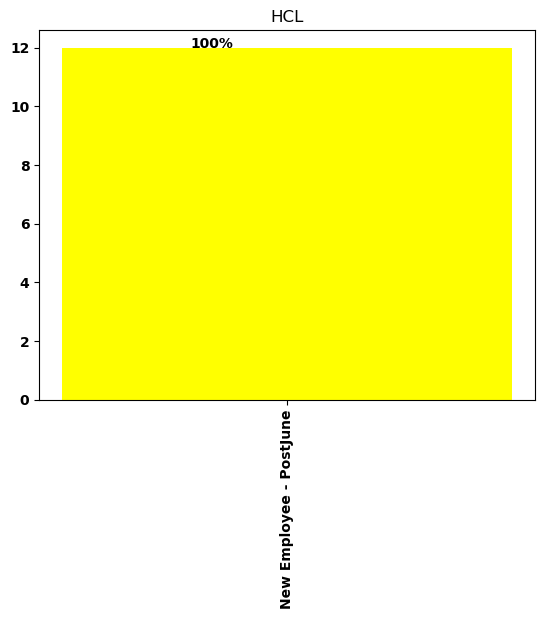

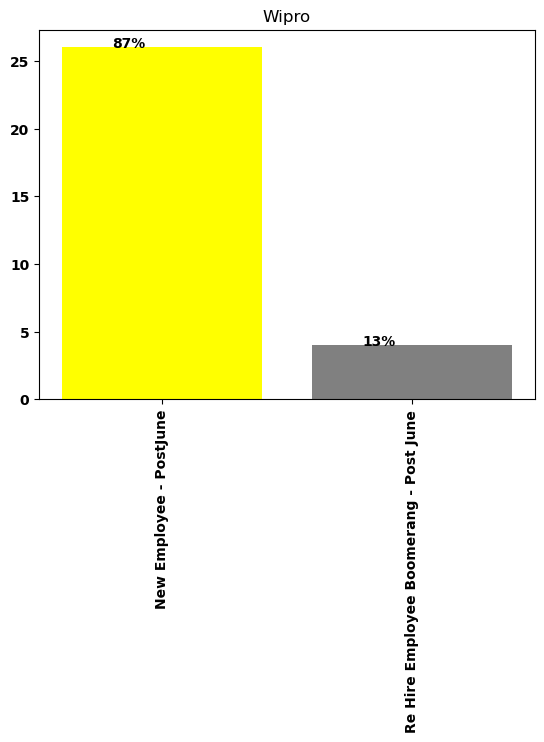

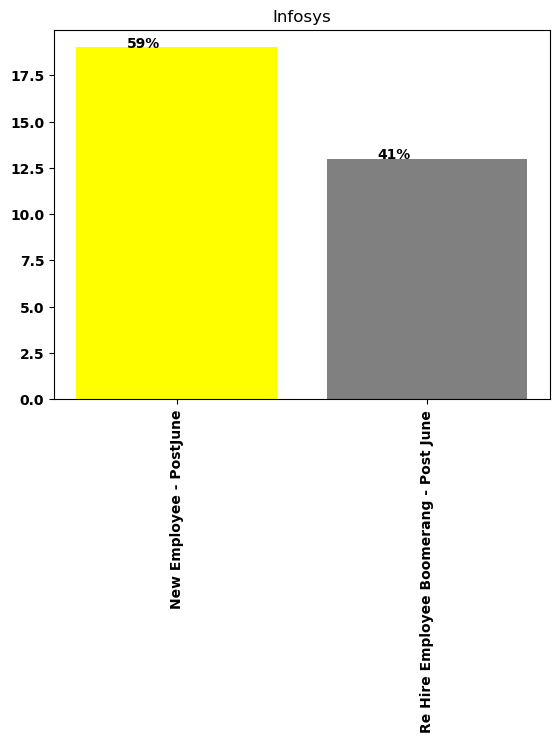

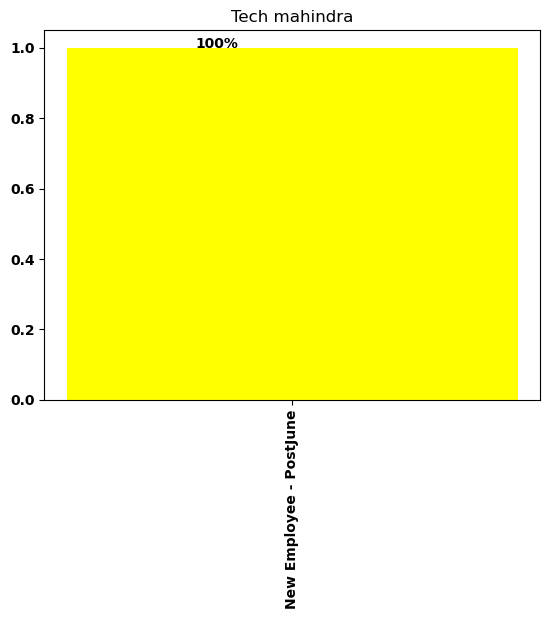

[1]

In [111]:
for employerlist in employer_list:
    temp_df = df_service_exp[df_service_exp['PreviousEmployer'] == employerlist]
    val = temp_df['Hiretype'].value_counts()
    hiretype_names = list(val.index)
    hiretype_count = list(val.values)
    #name = ["Gurgaon"]
    color_list = []
    for i in range(0,len(hiretype_names),2):
        color_list.append("Yellow")
        if i+1 != len(hiretype_names):
            color_list.append("gray")
    barchart = plt.bar(hiretype_names, hiretype_count, color = color_list)
    #plt.bar(name, city_count)
    for bc, name in zip(barchart, hiretype_names):
        dt1 = df_service_exp[df_service_exp['PreviousEmployer']== employerlist]
        dt2 = dt1[dt1['Hiretype']==name] #'Uttar Pradesh']
        percentage = len(dt2)/len(dt1)  
        width = bc.get_width()
        height = bc.get_height()
        x, y = bc.get_xy()
        plt.text(x + width/3, y + height * 1, str(round(percentage* 100)) + '%', ha='center')
    plt.xticks(rotation=90)
    plt.title(employerlist)
    plt.show()
hiretype_count

In [164]:
## Consultant wise job description ##
df_consultants_exp = df_big_4[(df_big_4['PreviousEmployer'] == 'Accenture') | (df_big_4['PreviousEmployer'] == 'Capgemini') | (df_big_4['PreviousEmployer'] =='DXC') | (df_big_4['PreviousEmployer'] == 'IBM') | (df_big_4['PreviousEmployer'] == 'Kyndryl')] 

In [166]:
## Checking the Center wise relocation ##
employer_list = list(df_consultants_exp.PreviousEmployer.unique())
employer_list

['Accenture', 'IBM', 'Capgemini']

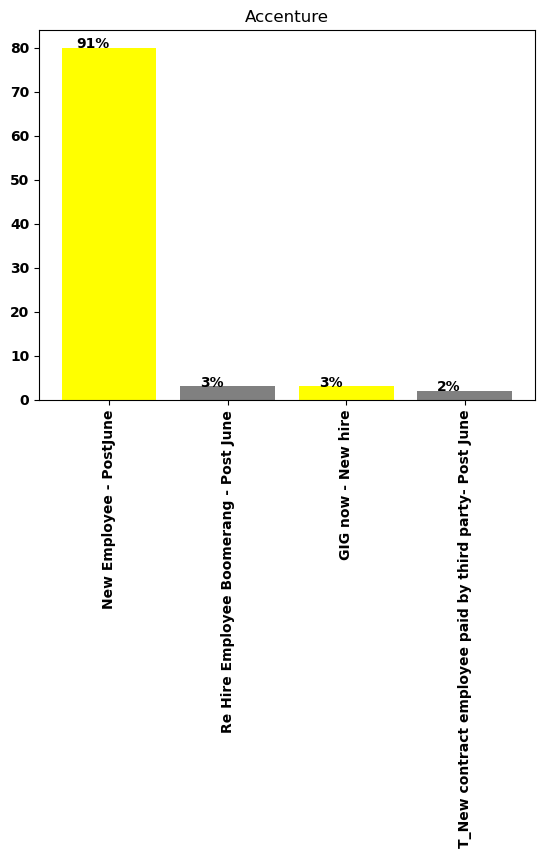

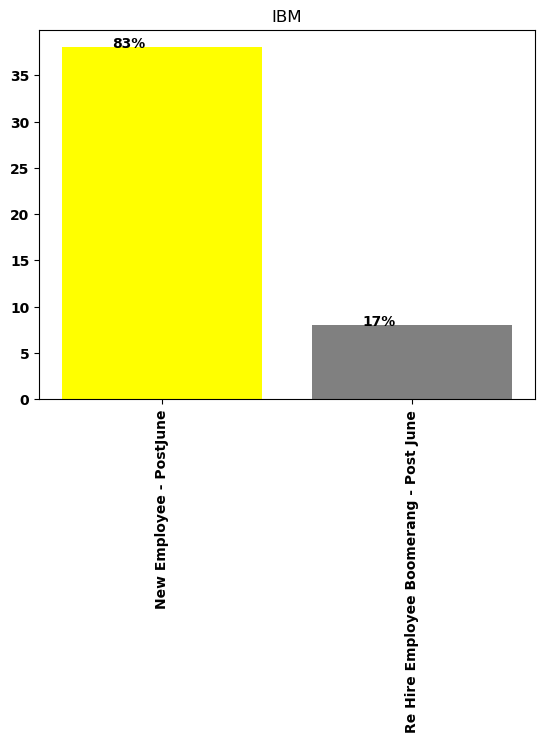

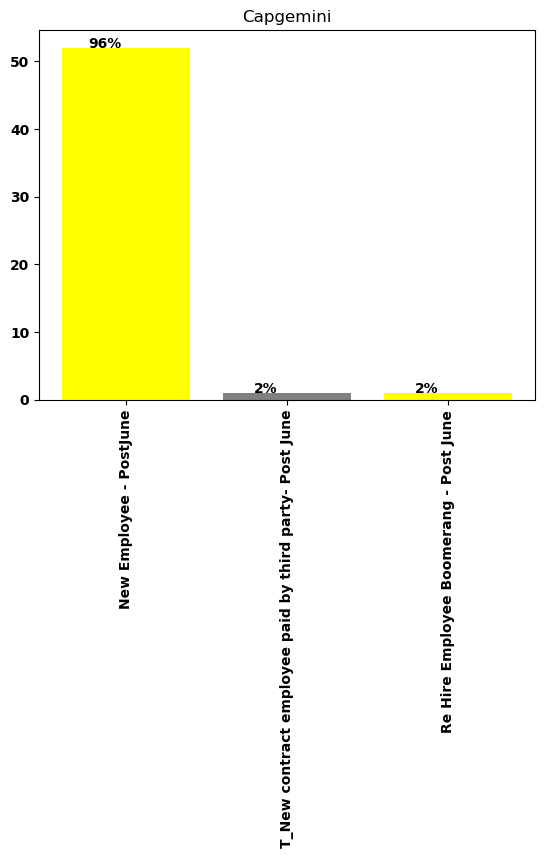

[52, 1, 1]

In [168]:
for employerlist in employer_list:
    temp_df = df_consultants_exp[df_consultants_exp['PreviousEmployer'] == employerlist]
    val = temp_df['Hiretype'].value_counts()
    hiretype_names = list(val.index)
    hiretype_count = list(val.values)
    #name = ["Gurgaon"]
    color_list = []
    for i in range(0,len(hiretype_names),2):
        color_list.append("Yellow")
        if i+1 != len(hiretype_names):
            color_list.append("gray")
    barchart = plt.bar(hiretype_names, hiretype_count, color = color_list)
    #plt.bar(name, city_count)
    for bc, name in zip(barchart, hiretype_names):
        dt1 = df_consultants_exp[df_consultants_exp['PreviousEmployer']== employerlist]
        dt2 = dt1[dt1['Hiretype']==name] #'Uttar Pradesh']
        percentage = len(dt2)/len(dt1)  
        width = bc.get_width()
        height = bc.get_height()
        x, y = bc.get_xy()
        plt.text(x + width/3, y + height * 1, str(round(percentage* 100)) + '%', ha='center')
    plt.xticks(rotation=90)
    plt.title(employerlist)
    plt.show()
hiretype_count


## Boomerang wise data distribution ##


<AxesSubplot:>

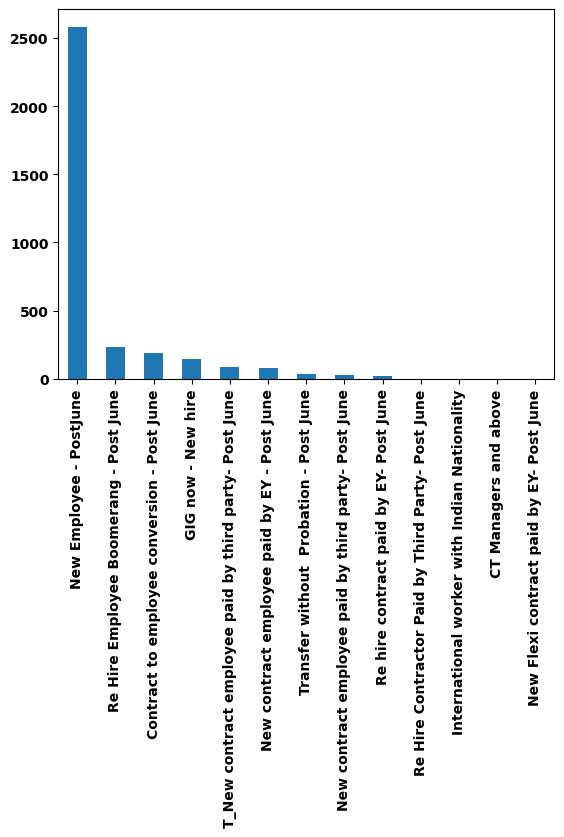

In [167]:
df_big_4['Hiretype'].value_counts().plot.bar()

In [130]:
df_big_4['Hiretype'].value_counts()

New Employee - PostJune                                   2583
Re Hire Employee Boomerang - Post June                     235
Contract to employee conversion - Post June                191
GIG now - New hire                                         144
T_New contract employee paid by third party- Post June      89
New contract employee paid by EY - Post June                80
Transfer without  Probation - Post June                     34
New contract employee paid by third party- Post June        27
Re hire contract paid by EY- Post June                      22
Re Hire Contractor Paid by Third Party- Post June            1
International worker with Indian Nationality                 1
CT Managers and above                                        1
New Flexi contract paid by EY- Post June                     1
Name: Hiretype, dtype: int64

In [131]:
df_boomerang = df_big_4[df_big_4['Hiretype'] =='Re Hire Employee Boomerang - Post June']

In [132]:
## Designation wise gender distribution for bomerang employee ##
df_boomerang['Designation'].value_counts()

Senior Associate            44
Supervising Associate       32
Associate                   28
Assistant Director          17
Assistant Manager           13
Lead Finance Analyst        13
Deputy Manager              11
Associate Manager           11
Associate Analyst           10
Team Lead                   10
Manager                      7
Advanced Associate           7
Lead Analyst                 5
Associate Director           5
Supervising Analyst          5
Analyst                      5
Senior Finance Analyst       4
Advanced Finance Analyst     3
Senior Team Lead             2
Process Associate            1
Senior Manager               1
Designer                     1
Name: Designation, dtype: int64

<AxesSubplot:>

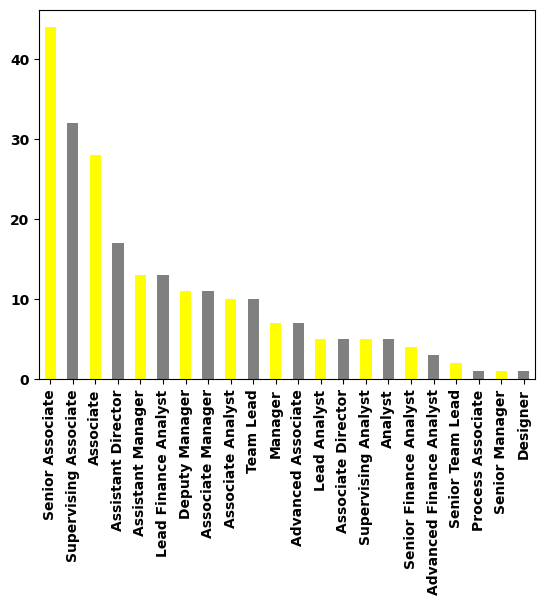

In [214]:
## Designation wise gender distribution for bomerang employee ##
df_boomerang['Designation'].value_counts().plot.bar(color=["yellow","grey"])

In [133]:
df_boomerang['Title'].value_counts()

Mr    155
Ms     80
Name: Title, dtype: int64

In [134]:
Gender_list = list(df_boomerang['Title'].unique())
Gender_list

['Mr', 'Ms']

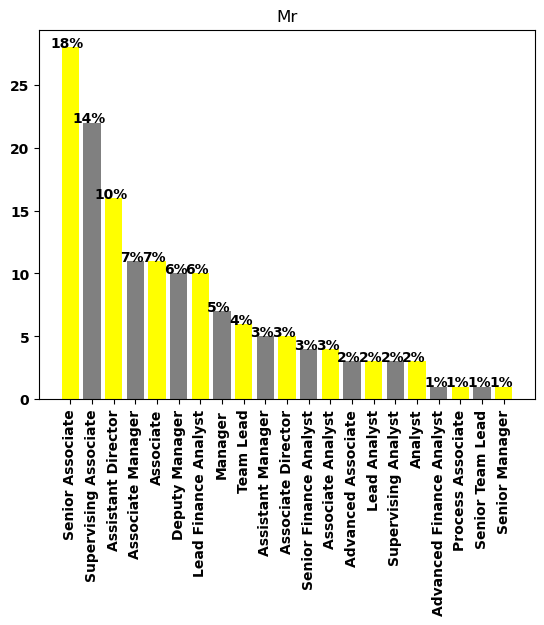

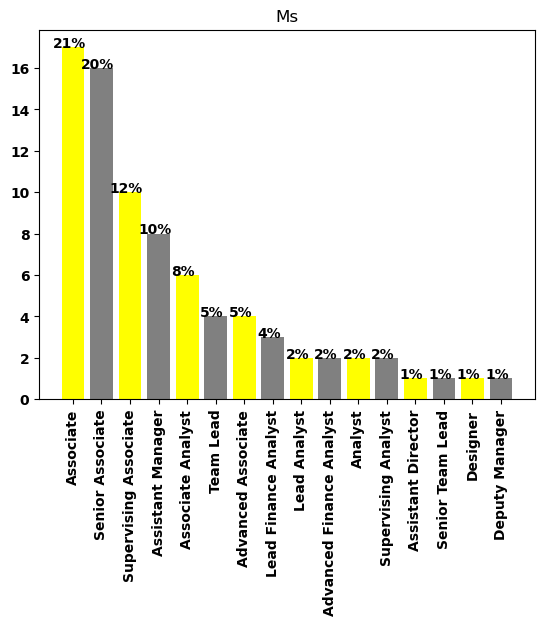

[17, 16, 10, 8, 6, 4, 4, 3, 2, 2, 2, 2, 1, 1, 1, 1]

In [135]:
for genderlist in Gender_list:
    temp_df = df_boomerang[df_boomerang['Title'] == genderlist]
    val = temp_df['Designation'].value_counts()
    designation_names = list(val.index)
    designation_count = list(val.values)
    #name = ["Gurgaon"]
    color_list = []
    for i in range(0,len(designation_names),2):
        color_list.append("Yellow")
        if i+1 != len(designation_names):
            color_list.append("gray")
    barchart = plt.bar(designation_names, designation_count, color = color_list)
    #plt.bar(name, city_count)
    for bc, name in zip(barchart, designation_names):
        dt1 = df_boomerang[df_boomerang['Title']== genderlist]
        dt2 = dt1[dt1['Designation']==name] #'Uttar Pradesh']
        percentage = len(dt2)/len(dt1)  
        width = bc.get_width()
        height = bc.get_height()
        x, y = bc.get_xy()
        plt.text(x + width/3, y + height * 1, str(round(percentage* 100)) + '%', ha='center')
    plt.xticks(rotation=90)
    plt.title(genderlist)
    plt.show()
designation_count

In [136]:
## previous employer wise distribution ##
df_boomerang['PreviousEmployer'].value_counts()

Infosys                                                46
EY GDS                                                 29
Kyndryl                                                14
Ernst & Young                                          10
KPMG                                                    9
IBM                                                     8
Deloitte                                                8
Wipro                                                   5
Oracle                                                  4
Amazon                                                  3
Deloitte                                                3
Accenture                                               3
PWC                                                     3
Allianz                                                 3
HCL                                                     2
Dentsu International                                    2
TCS                                                     2
Genpact       

<AxesSubplot:>

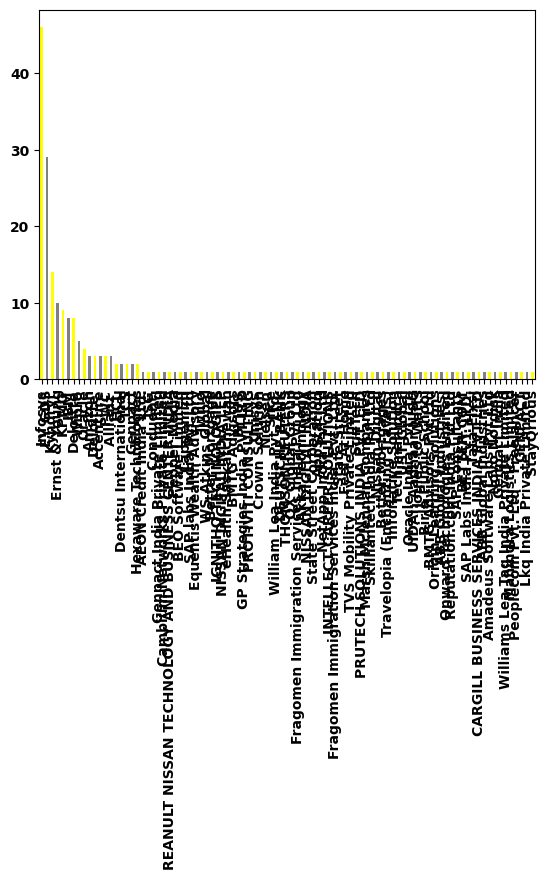

In [215]:
## previous employer wise distribution ##
df_boomerang['PreviousEmployer'].value_counts().plot.bar(color=["yellow","grey"])

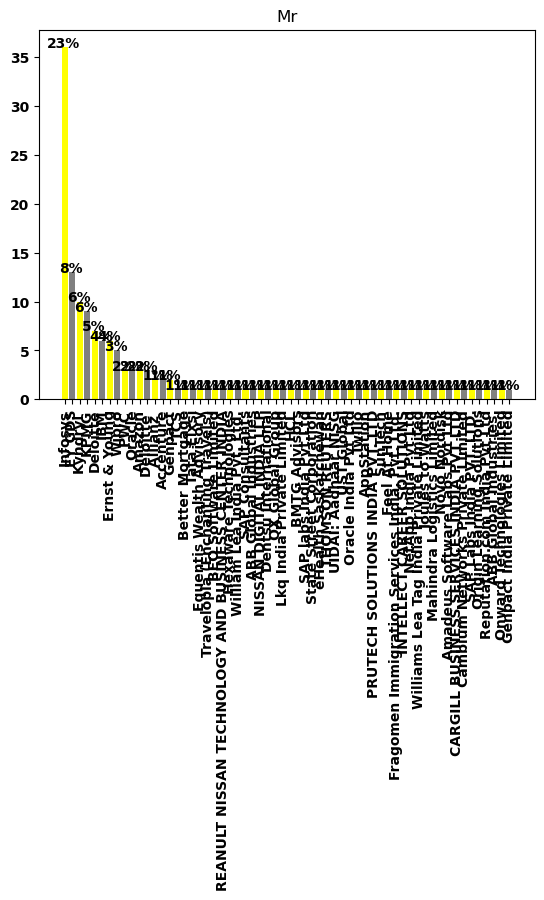

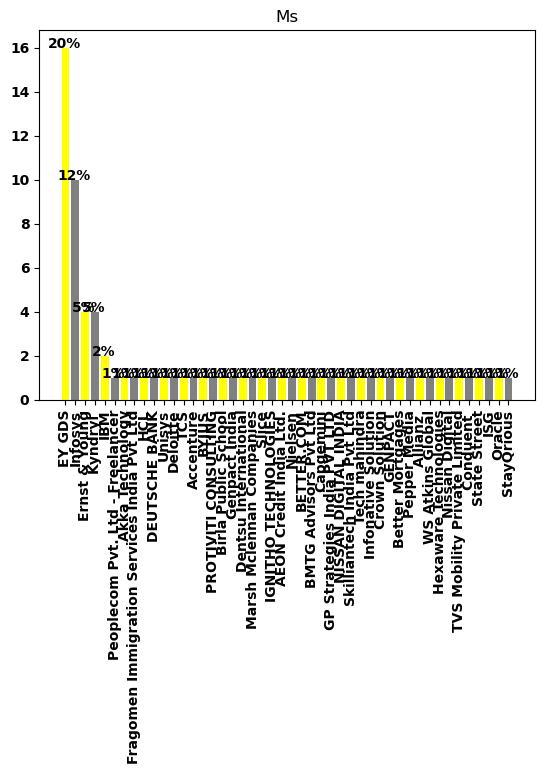

[16,
 10,
 4,
 4,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [138]:
for genderlist in Gender_list:
    temp_df = df_boomerang[df_boomerang['Title'] == genderlist]
    val = temp_df['PreviousEmployer'].value_counts()
    employer_names = list(val.index)
    employer_count = list(val.values)
    #name = ["Gurgaon"]
    color_list = []
    for i in range(0,len(employer_names),2):
        color_list.append("Yellow")
        if i+1 != len(employer_names):
            color_list.append("gray")
    barchart = plt.bar(employer_names, employer_count, color = color_list)
    #plt.bar(name, city_count)
    for bc, name in zip(barchart, employer_names):
        dt1 = df_boomerang[df_boomerang['Title']== genderlist]
        dt2 = dt1[dt1['PreviousEmployer']==name] #'Uttar Pradesh']
        percentage = len(dt2)/len(dt1)  
        width = bc.get_width()
        height = bc.get_height()
        x, y = bc.get_xy()
        plt.text(x + width/3, y + height * 1, str(round(percentage* 100)) + '%', ha='center')
    plt.xticks(rotation=90)
    plt.title(genderlist)
    plt.show()
employer_count

In [139]:
## Filling all the blank value with 0 ##
df_big_4['JoiningBonus'] = df_big_4['JoiningBonus'].fillna(0)

In [142]:
df_big_4['JoiningBonus'].value_counts()

0.0         3700
100000.0      26
150000.0      19
50000.0       19
75000.0        5
60000.0        4
200000.0       3
70000.0        2
35000.0        1
76000.0        1
265000.0       1
300000.0       1
40000.0        1
80000.0        1
500000.0       1
54325.0        1
110000.0       1
250000.0       1
370820.0       1
350000.0       1
Name: JoiningBonus, dtype: int64

In [143]:
df_boomerang['JoiningBonus'].value_counts()

150000.0    2
0.0         2
35000.0     1
300000.0    1
70000.0     1
265000.0    1
60000.0     1
Name: JoiningBonus, dtype: int64

In [147]:
df_boomerang_info_1 = df_boomerang[df_boomerang['JoiningBonus']== 150000.0]

In [148]:
df_boomerang_info_1

Masked ID                                Hiretype Title  \
2265   ID 3161  Re Hire Employee Boomerang - Post June    Mr   
3266    ID 858  Re Hire Employee Boomerang - Post June    Ms   

                Designation  NoticePeriod Qualification CourseCompletionYear  \
2265     Associate Director           3.0            CS           30-06-2007   
3266  Supervising Associate           2.0           BCA           02-06-2014   

     PreviousEmployer  JoiningBonus  \
2265              IBM      150000.0   
3266        Capgemini      150000.0   

                   GoodsTransportationTravelEligibility  \
2265  Not applicable / Not Eligible for relocation b...   
3266  Not applicable / Not Eligible for relocation b...   

     IsNoticePeriodReimbursementProvided  Rank  
2265                               False    65  
3266                               False    65

In [150]:
df_boomerang_info_2= df_boomerang[df_boomerang['JoiningBonus']== 300000.0]

In [151]:
df_boomerang_info_2

Masked ID                                Hiretype Title  \
2402   ID 3290  Re Hire Employee Boomerang - Post June    Mr   

             Designation  NoticePeriod Qualification CourseCompletionYear  \
2402  Associate Director           3.0          Bcom           01-06-1999   

                             PreviousEmployer  JoiningBonus  \
2402  CARGILL BUSINESS SERVICES INDIA PVT LTD      300000.0   

                   GoodsTransportationTravelEligibility  \
2402  Not applicable / Not Eligible for relocation b...   

     IsNoticePeriodReimbursementProvided  Rank  
2402                               False    64

In [152]:
df_boomerang_info_3 = df_boomerang[df_boomerang['JoiningBonus']== 265000.0]

In [153]:
df_boomerang_info_3

Masked ID                                Hiretype Title  \
646   ID 1641  Re Hire Employee Boomerang - Post June    Mr   

               Designation  NoticePeriod Qualification CourseCompletionYear  \
646  Supervising Associate           2.0    GGSIPU /BA           01-06-2016   

    PreviousEmployer  JoiningBonus  \
646             KPMG      265000.0   

                  GoodsTransportationTravelEligibility  \
646  Not applicable / Not Eligible for relocation b...   

    IsNoticePeriodReimbursementProvided  Rank  
646                               False    66

In [156]:
df_boomerang_info_4 = df_boomerang[df_boomerang['JoiningBonus']== 70000.0]
df_boomerang_info_5 = df_boomerang[df_boomerang['JoiningBonus']== 35000.0]

In [157]:
df_boomerang_info_5

Masked ID                                Hiretype Title Designation  \
1586   ID 2522  Re Hire Employee Boomerang - Post June    Ms   Associate   

      NoticePeriod Qualification CourseCompletionYear PreviousEmployer  \
1586           2.0         M.Com           30-06-2017          Infosys   

      JoiningBonus               GoodsTransportationTravelEligibility  \
1586       35000.0  Not applicable / Not Eligible for relocation b...   

     IsNoticePeriodReimbursementProvided  Rank  
1586                               False    66

## Hiretype - New Employee distribution ##

In [158]:
df_big_4['Hiretype'].value_counts()

New Employee - PostJune                                   2583
Re Hire Employee Boomerang - Post June                     235
Contract to employee conversion - Post June                191
GIG now - New hire                                         144
T_New contract employee paid by third party- Post June      89
New contract employee paid by EY - Post June                80
Transfer without  Probation - Post June                     34
New contract employee paid by third party- Post June        27
Re hire contract paid by EY- Post June                      22
Re Hire Contractor Paid by Third Party- Post June            1
International worker with Indian Nationality                 1
CT Managers and above                                        1
New Flexi contract paid by EY- Post June                     1
Name: Hiretype, dtype: int64

In [170]:
df_big_4_New_Hire = df_big_4[df_big_4['Hiretype']=='New Employee - PostJune']

In [171]:
df_big_4_New_Hire

Masked ID                 Hiretype Title  \
1      ID 1001  New Employee - PostJune    Mr   
3      ID 1003  New Employee - PostJune    Mr   
4      ID 1004  New Employee - PostJune    Mr   
5      ID 1005  New Employee - PostJune    Ms   
6      ID 1006  New Employee - PostJune    Mr   
7      ID 1007  New Employee - PostJune    Ms   
8      ID 1008  New Employee - PostJune    Mr   
9      ID 1009  New Employee - PostJune    Ms   
10     ID 1010  New Employee - PostJune    Ms   
11     ID 1011  New Employee - PostJune    Mr   
12     ID 1012  New Employee - PostJune    Ms   
14     ID 1014  New Employee - PostJune    Ms   
16     ID 1016  New Employee - PostJune    Ms   
18     ID 1018  New Employee - PostJune    Mr   
19     ID 1019  New Employee - PostJune    Ms   
20     ID 1020  New Employee - PostJune    Ms   
21     ID 1021  New Employee - PostJune    Ms   
22     ID 1022  New Employee - PostJune    Mr   
27     ID 1027  New Employee - PostJune    Ms   
29      ID 103  New Employee - PostJune    Mr   
30     ID 1030  New Employee - PostJune    Ms   
33     ID 1033  New Employee - PostJune    Ms   
38     ID 1038  New Employee - PostJune    Ms   
39     ID 1040  New Employee - PostJune    Mr   
40     ID 1041  New Employee - PostJune    Ms   
42     ID 1043  New Employee - PostJune    Mr   
43     ID 1044  New Employee - PostJune    Ms   
54     ID 1056  New Employee - PostJune    Ms   
55     ID 1057  New Employee - PostJune    Mr   
58      ID 106  New Employee - PostJune    Mr   
63     ID 1064  New Employee - PostJune    Mr   
64     ID 1065  New Employee - PostJune    Mr   
66     ID 1068  New Employee - PostJune    Ms   
67     ID 1069  New Employee - PostJune    Ms   
68     ID 1070  New Employee - PostJune    Ms   
69     ID 1071  New Employee - PostJune    Ms   
70     ID 1072  New Employee - PostJune    Mr   
71     ID 1073  New Employee - PostJune    Mr   
72     ID 1074  New Employee - PostJune    Mr   
73     ID 1075  New Employee - PostJune    Ms   
74     ID 1076  New Employee - PostJune    Mr   
76     ID 1078  New Employee - PostJune    Mr   
78      ID 108  New Employee - PostJune    Ms   
79     ID 1080  New Employee - PostJune    Mr   
80     ID 1081  New Employee - PostJune    Ms   
84     ID 1085  New Employee - PostJune    Mr   
86     ID 1087  New Employee - PostJune    Ms   
87     ID 1088  New Employee - PostJune    Mr   
88     ID 1089  New Employee - PostJune    Ms   
89     ID 1090  New Employee - PostJune    Ms   
90     ID 1091  New Employee - PostJune    Mr   
91     ID 1092  New Employee - PostJune    Mr   
92     ID 1093  New Employee - PostJune    Mr   
93     ID 1094  New Employee - PostJune    Ms   
94     ID 1095  New Employee - PostJune    Mr   
95     ID 1096  New Employee - PostJune    Ms   
96     ID 1097  New Employee - PostJune    Ms   
97     ID 1098  New Employee - PostJune    Ms   
99     ID 1100  New Employee - PostJune    Ms   
100    ID 1103  New Employee - PostJune    Ms   
101    ID 1104  New Employee - PostJune    Mr   
102    ID 1105  New Employee - PostJune    Mr   
103    ID 1106  New Employee - PostJune    Mr   
104    ID 1107  New Employee - PostJune    Mr   
105    ID 1108  New Employee - PostJune    Mr   
110    ID 1112  New Employee - PostJune    Mr   
111    ID 1113  New Employee - PostJune    Mr   
112    ID 1114  New Employee - PostJune    Ms   
113    ID 1115  New Employee - PostJune    Mr   
114    ID 1116  New Employee - PostJune    Ms   
115    ID 1117  New Employee - PostJune    Mr   
116    ID 1118  New Employee - PostJune    Ms   
117    ID 1119  New Employee - PostJune    Mr   
118    ID 1120  New Employee - PostJune    Ms   
119    ID 1121  New Employee - PostJune    Mr   
122    ID 1125  New Employee - PostJune    Ms   
123    ID 1126  New Employee - PostJune    Mr   
124    ID 1127  New Employee - PostJune    Ms   
125    ID 1128  New Employee - PostJune    Mr   
126    ID 1129  New Employee - PostJune    Mr   
127    ID 1130  New Employee - PostJ

In [176]:
## Designation wise value counts ##
df_big_4_New_Hire['Designation'].value_counts()

Senior Associate                                       645
Associate                                              587
Associate Analyst                                      232
Supervising Associate                                  231
Assistant Manager                                      129
Assistant Director                                     101
Associate Manager                                       90
Analyst                                                 62
Supervising Analyst                                     60
Advanced Associate                                      59
Manager                                                 53
Senior Finance Analyst                                  52
Lead Finance Analyst                                    47
Advanced Analyst                                        38
Team Lead                                               36
Deputy Manager                                          30
Lead Analyst                                            

<AxesSubplot:>

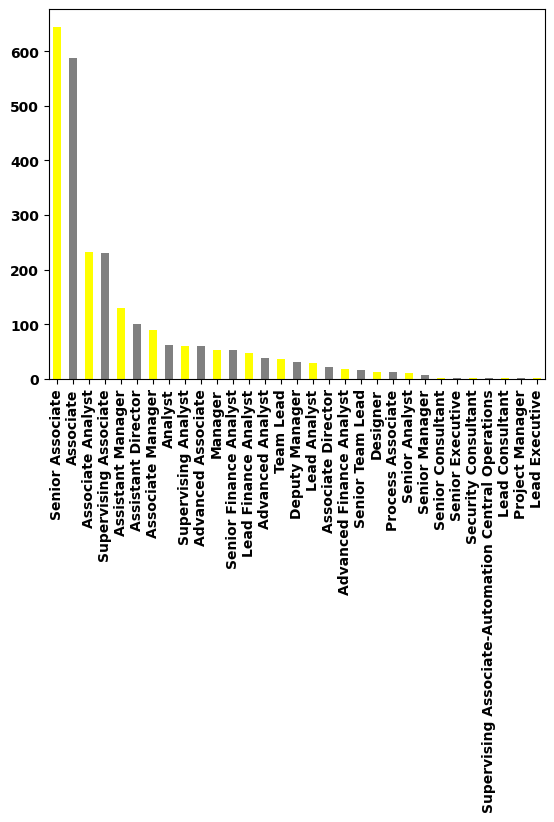

In [175]:
## Designation wise value counts ##
df_big_4_New_Hire['Designation'].value_counts().plot.bar(color=["yellow","grey"])

In [174]:
## Noticeperiod value counts ##
df_big_4_New_Hire['NoticePeriod'].value_counts()

2.0    2429
3.0     154
Name: NoticePeriod, dtype: int64

In [177]:
## Qualification wise value counts ##
df_big_4_New_Hire['Qualification'].value_counts()

MBA                                                                       646
B.Tech                                                                    278
BE                                                                        152
B.Com                                                                     126
PGDM                                                                      115
MCA                                                                        98
BA                                                                         79
BCA                                                                        64
Btech                                                                      63
BBA                                                                        55
B.E                                                                        34
B.Sc                                                                       34
MA                                                              

In [179]:
## Qualification wise value counts ##
df_big_4_New_Hire['Title'].value_counts()

Mr    1395
Ms    1188
Name: Title, dtype: int64

## Organization based distribution ##

In [182]:
## Big 4 wise distribution ##
df_big_4_exp = df_big_4[(df_big_4['PreviousEmployer'] == 'Deloitte') | (df_big_4['PreviousEmployer'] == 'PWC') | (df_big_4['PreviousEmployer'] =='KPMG') | (df_big_4['PreviousEmployer'] =='Ernst & Young')]

In [183]:
df_big_4_exp

array(['Ernst & Young', 'KPMG', 'Deloitte', 'PWC'], dtype=object)

In [184]:
df_big_4_exp_new_join = df_big_4_exp[df_big_4_exp['Hiretype']=='New Employee - PostJune']

In [186]:
df_big_4_exp_new_join['PreviousEmployer'].value_counts()

KPMG             54
PWC              36
Deloitte         24
Ernst & Young     1
Name: PreviousEmployer, dtype: int64

In [187]:
df_big_4_exp_new_join['Designation'].value_counts()

Senior Associate         58
Supervising Associate    13
Associate Manager         9
Assistant Manager         8
Assistant Director        7
Associate                 5
Manager                   3
Associate Analyst         3
Advanced Associate        2
Supervising Analyst       2
Analyst                   1
Lead Finance Analyst      1
Associate Director        1
Process Associate         1
Team Lead                 1
Name: Designation, dtype: int64

In [188]:
df_big_4_exp_new_join['Title'].value_counts()

Mr    61
Ms    54
Name: Title, dtype: int64

In [189]:
employer_list = list(df_big_4_exp_new_join['PreviousEmployer'].unique())
employer_list

['KPMG', 'Deloitte', 'PWC', 'Ernst & Young']

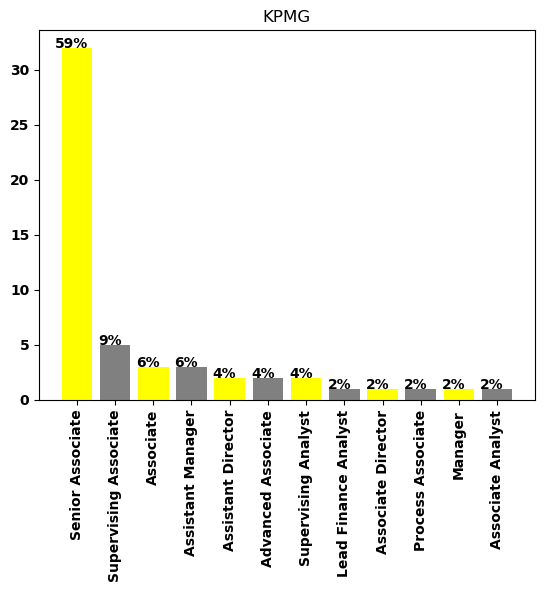

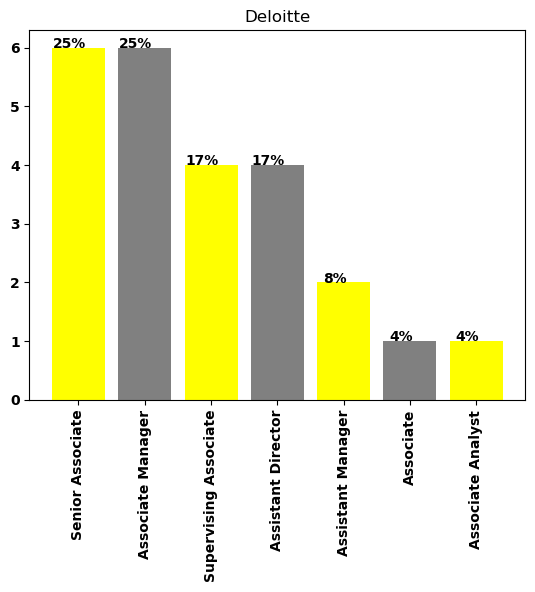

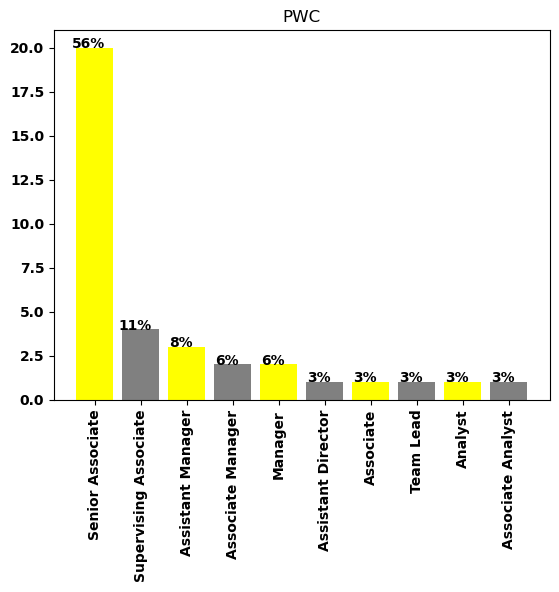

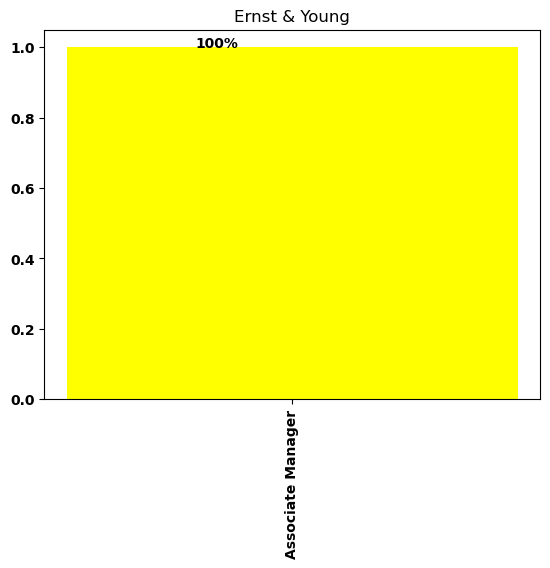

[1]

In [190]:
## Designation based distribution
for employerlist in employer_list:
    temp_df = df_big_4_exp_new_join[df_big_4_exp_new_join['PreviousEmployer'] == employerlist]
    val = temp_df['Designation'].value_counts()
    designation_names = list(val.index)
    designation_count = list(val.values)
    #name = ["Gurgaon"]
    color_list = []
    for i in range(0,len(designation_names),2):
        color_list.append("Yellow")
        if i+1 != len(designation_names):
            color_list.append("gray")
    barchart = plt.bar(designation_names, designation_count, color = color_list)
    #plt.bar(name, city_count)
    for bc, name in zip(barchart, designation_names):
        dt1 = df_big_4_exp_new_join[df_big_4_exp_new_join['PreviousEmployer']== employerlist]
        dt2 = dt1[dt1['Designation']==name] #'Uttar Pradesh']
        percentage = len(dt2)/len(dt1)  
        width = bc.get_width()
        height = bc.get_height()
        x, y = bc.get_xy()
        plt.text(x + width/3, y + height * 1, str(round(percentage* 100)) + '%', ha='center')
    plt.xticks(rotation=90)
    plt.title(employerlist)
    plt.show()
designation_count

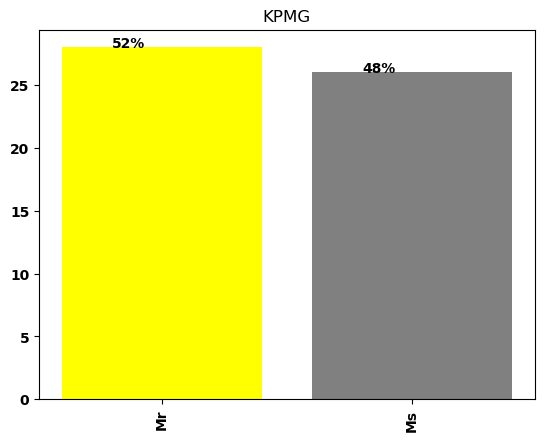

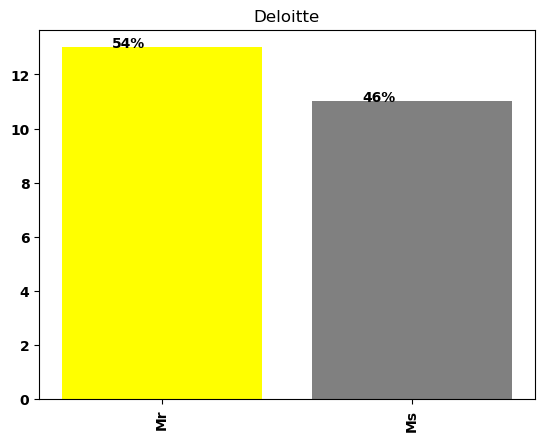

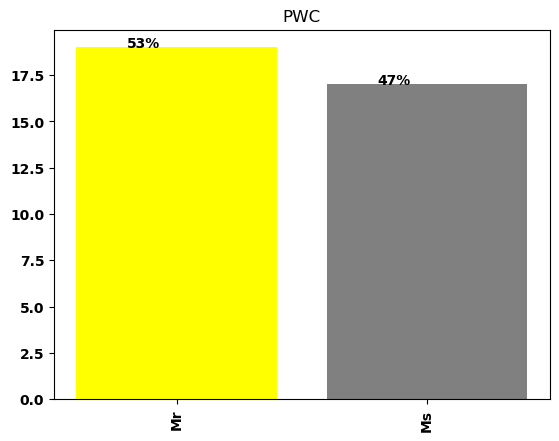

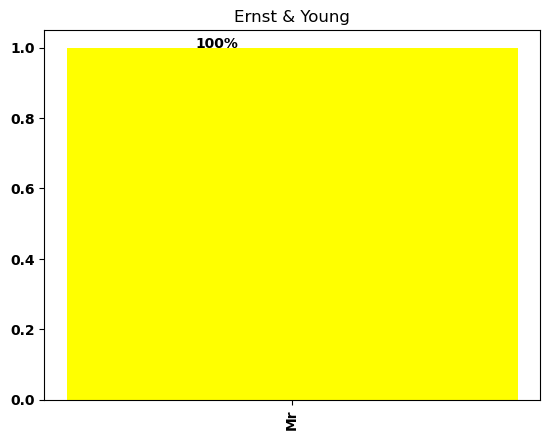

[1]

In [191]:
## Gender based distribution
## Designation based distribution
for employerlist in employer_list:
    temp_df = df_big_4_exp_new_join[df_big_4_exp_new_join['PreviousEmployer'] == employerlist]
    val = temp_df['Title'].value_counts()
    title_names = list(val.index)
    title_count = list(val.values)
    #name = ["Gurgaon"]
    color_list = []
    for i in range(0,len(title_names),2):
        color_list.append("Yellow")
        if i+1 != len(title_names):
            color_list.append("gray")
    barchart = plt.bar(title_names, title_count, color = color_list)
    #plt.bar(name, city_count)
    for bc, name in zip(barchart, title_names):
        dt1 = df_big_4_exp_new_join[df_big_4_exp_new_join['PreviousEmployer']== employerlist]
        dt2 = dt1[dt1['Title']==name] #'Uttar Pradesh']
        percentage = len(dt2)/len(dt1)  
        width = bc.get_width()
        height = bc.get_height()
        x, y = bc.get_xy()
        plt.text(x + width/3, y + height * 1, str(round(percentage* 100)) + '%', ha='center')
    plt.xticks(rotation=90)
    plt.title(employerlist)
    plt.show()
title_count

In [192]:
## Service Organization based distribution ##
df_service_exp = df[(df['PreviousEmployer'] == 'TCS') | (df['PreviousEmployer'] == 'Infosys') | (df['PreviousEmployer'] =='Wipro') | (df['PreviousEmployer'] =='HCL') | (df['PreviousEmployer'] =='Tech mahindra')] 

In [193]:
df_service_exp_new_join = df_service_exp[df_service_exp['Hiretype']=='New Employee - PostJune']

In [194]:
df_service_exp_new_join['PreviousEmployer'].value_counts()

TCS              42
Wipro            26
Infosys          19
HCL              12
Tech mahindra     1
Name: PreviousEmployer, dtype: int64

In [195]:
df_service_exp_new_join['Title'].value_counts()

Mr    56
Ms    44
Name: Title, dtype: int64

In [198]:
employer_list = list(df_service_exp_new_join['PreviousEmployer'].unique())
employer_list

['TCS', 'HCL', 'Wipro', 'Infosys', 'Tech mahindra']

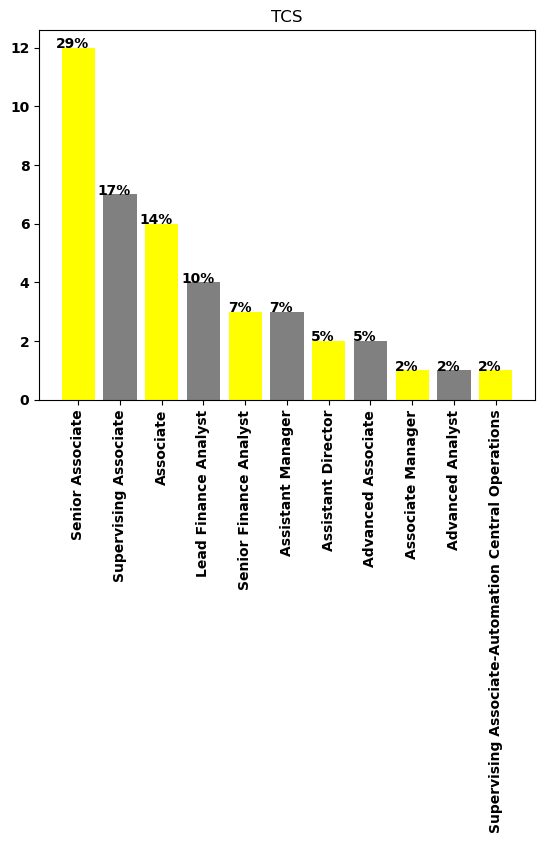

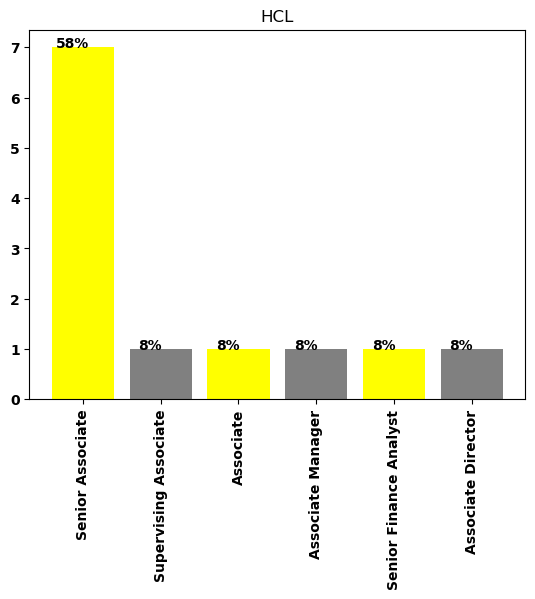

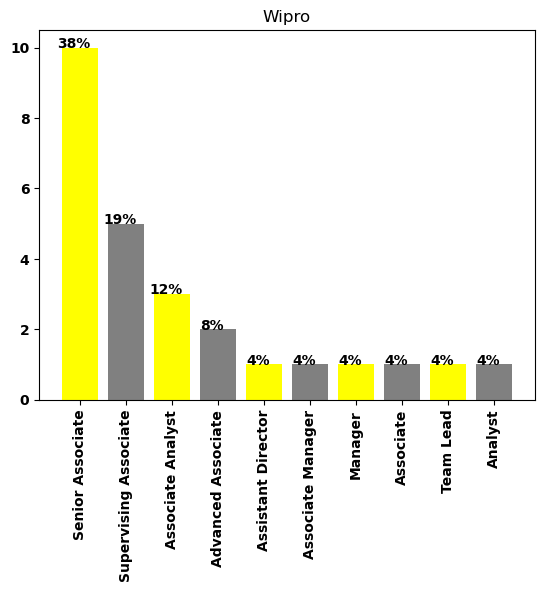

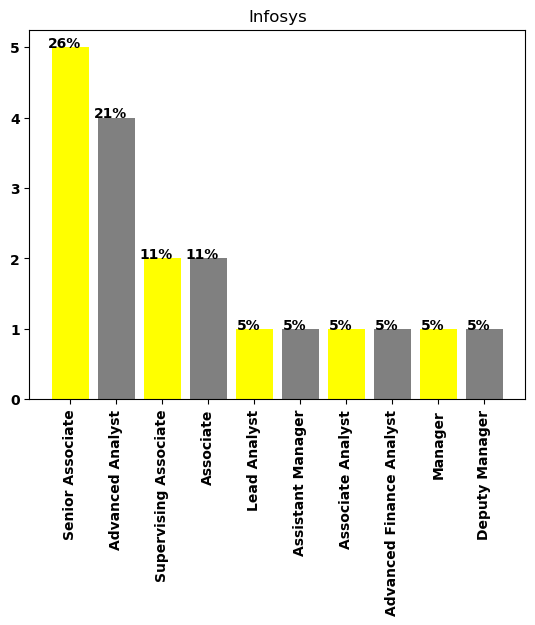

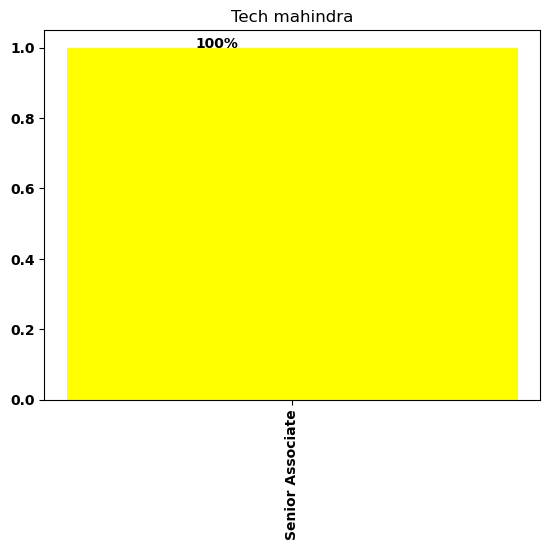

[1]

In [199]:
## Designation based distribution
for employerlist in employer_list:
    temp_df = df_service_exp_new_join[df_service_exp_new_join['PreviousEmployer'] == employerlist]
    val = temp_df['Designation'].value_counts()
    designation_names = list(val.index)
    designation_count = list(val.values)
    #name = ["Gurgaon"]
    color_list = []
    for i in range(0,len(designation_names),2):
        color_list.append("Yellow")
        if i+1 != len(designation_names):
            color_list.append("gray")
    barchart = plt.bar(designation_names, designation_count, color = color_list)
    #plt.bar(name, city_count)
    for bc, name in zip(barchart, designation_names):
        dt1 = df_service_exp_new_join[df_service_exp_new_join['PreviousEmployer']== employerlist]
        dt2 = dt1[dt1['Designation']==name] #'Uttar Pradesh']
        percentage = len(dt2)/len(dt1)  
        width = bc.get_width()
        height = bc.get_height()
        x, y = bc.get_xy()
        plt.text(x + width/3, y + height * 1, str(round(percentage* 100)) + '%', ha='center')
    plt.xticks(rotation=90)
    plt.title(employerlist)
    plt.show()
designation_count

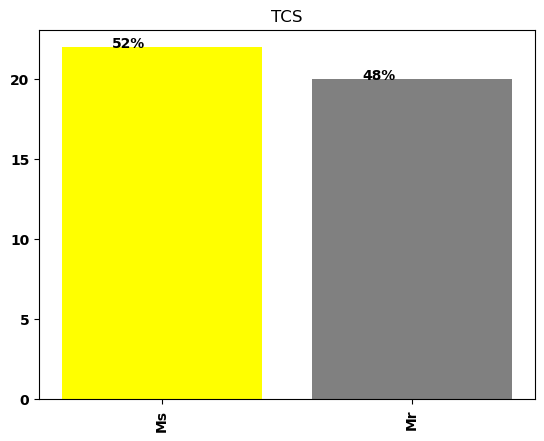

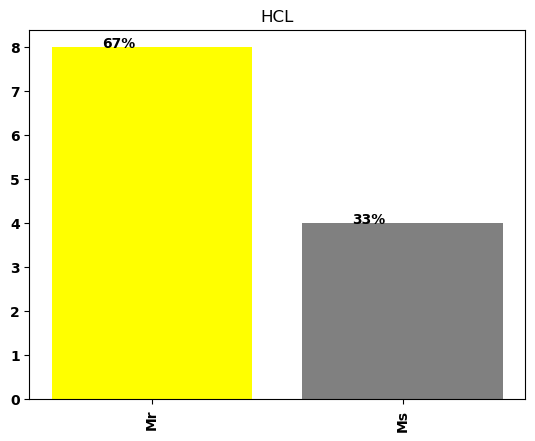

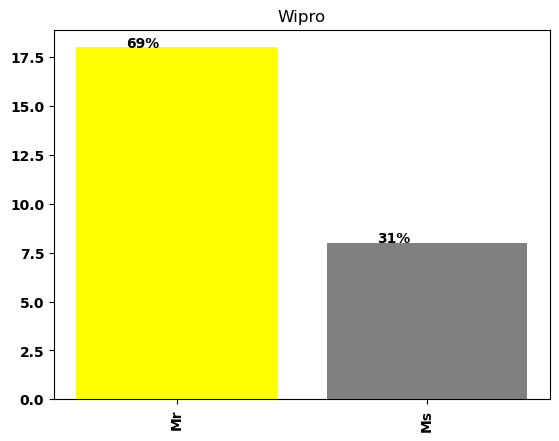

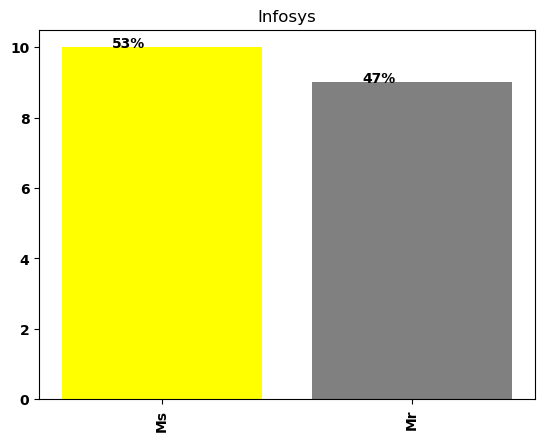

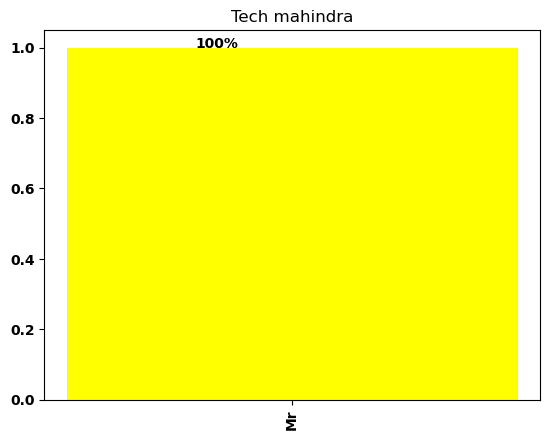

[1]

In [201]:
## Gender based distribution ##
for employerlist in employer_list:
    temp_df = df_service_exp_new_join[df_service_exp_new_join['PreviousEmployer'] == employerlist]
    val = temp_df['Title'].value_counts()
    title_names = list(val.index)
    title_count = list(val.values)
    #name = ["Gurgaon"]
    color_list = []
    for i in range(0,len(title_names),2):
        color_list.append("Yellow")
        if i+1 != len(title_names):
            color_list.append("gray")
    barchart = plt.bar(title_names, title_count, color = color_list)
    #plt.bar(name, city_count)
    for bc, name in zip(barchart, title_names):
        dt1 = df_service_exp_new_join[df_service_exp_new_join['PreviousEmployer']== employerlist]
        dt2 = dt1[dt1['Title']==name] #'Uttar Pradesh']
        percentage = len(dt2)/len(dt1)  
        width = bc.get_width()
        height = bc.get_height()
        x, y = bc.get_xy()
        plt.text(x + width/3, y + height * 1, str(round(percentage* 100)) + '%', ha='center')
    plt.xticks(rotation=90)
    plt.title(employerlist)
    plt.show()
title_count

In [202]:
## Consultant wise job description ##
df_consultants_exp = df_big_4[(df_big_4['PreviousEmployer'] == 'Accenture') | (df_big_4['PreviousEmployer'] == 'Capgemini') | (df_big_4['PreviousEmployer'] =='DXC') | (df_big_4['PreviousEmployer'] == 'IBM') | (df_big_4['PreviousEmployer'] == 'Kyndryl')] 

In [207]:
df_consultants_exp_new_join = df_consultants_exp[df_consultants_exp['Hiretype']=='New Employee - PostJune']

In [208]:
df_consultants_exp_new_join['PreviousEmployer'].value_counts()

Accenture    80
Capgemini    52
IBM          38
Name: PreviousEmployer, dtype: int64

In [209]:
employer_list = list(df_consultants_exp_new_join['PreviousEmployer'].unique())
employer_list

['Accenture', 'IBM', 'Capgemini']

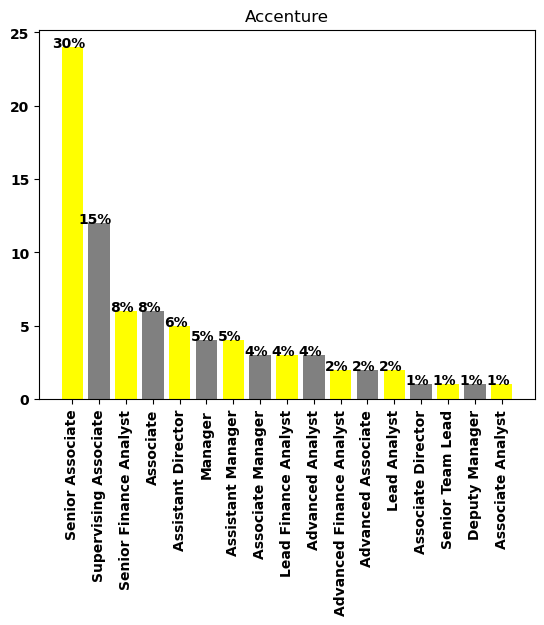

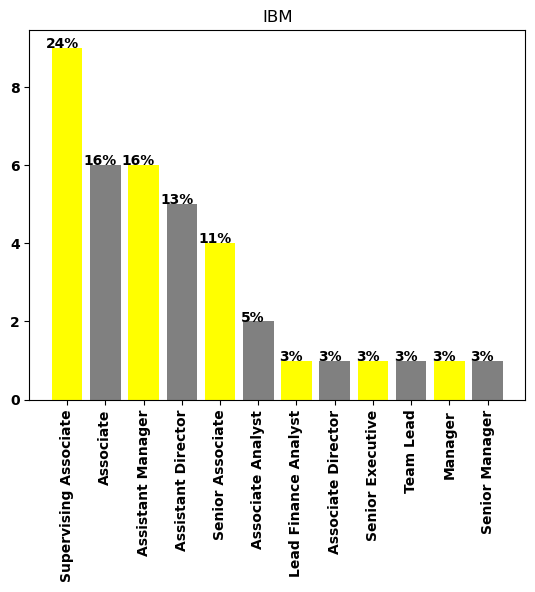

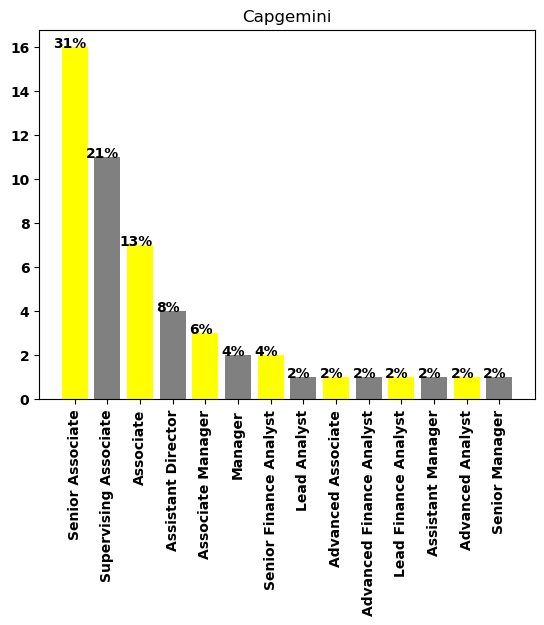

[16, 11, 7, 4, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1]

In [210]:
## Designation based distribution
for employerlist in employer_list:
    temp_df = df_consultants_exp_new_join[df_consultants_exp_new_join['PreviousEmployer'] == employerlist]
    val = temp_df['Designation'].value_counts()
    designation_names = list(val.index)
    designation_count = list(val.values)
    #name = ["Gurgaon"]
    color_list = []
    for i in range(0,len(designation_names),2):
        color_list.append("Yellow")
        if i+1 != len(designation_names):
            color_list.append("gray")
    barchart = plt.bar(designation_names, designation_count, color = color_list)
    #plt.bar(name, city_count)
    for bc, name in zip(barchart, designation_names):
        dt1 = df_consultants_exp_new_join[df_consultants_exp_new_join['PreviousEmployer']== employerlist]
        dt2 = dt1[dt1['Designation']==name] #'Uttar Pradesh']
        percentage = len(dt2)/len(dt1)  
        width = bc.get_width()
        height = bc.get_height()
        x, y = bc.get_xy()
        plt.text(x + width/3, y + height * 1, str(round(percentage* 100)) + '%', ha='center')
    plt.xticks(rotation=90)
    plt.title(employerlist)
    plt.show()
designation_count

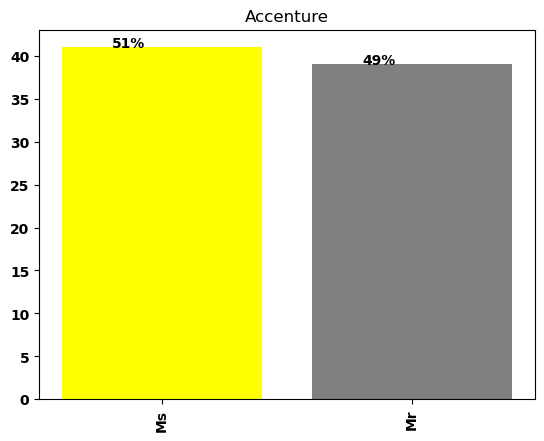

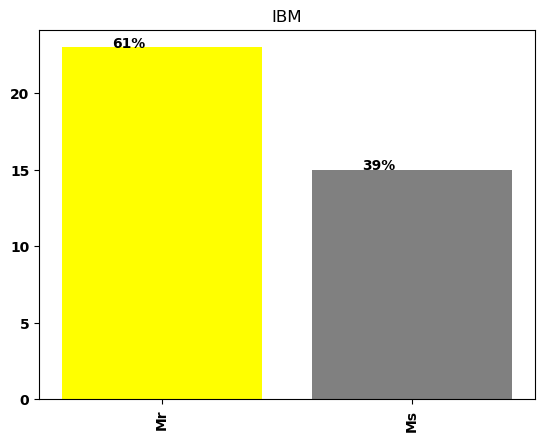

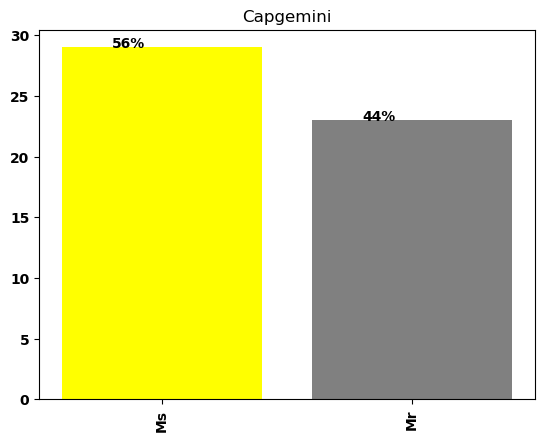

[29, 23]

In [212]:
## Gender based distribution
for employerlist in employer_list:
    temp_df = df_consultants_exp_new_join[df_consultants_exp_new_join['PreviousEmployer'] == employerlist]
    val = temp_df['Title'].value_counts()
    title_names = list(val.index)
    title_count = list(val.values)
    #name = ["Gurgaon"]
    color_list = []
    for i in range(0,len(title_names),2):
        color_list.append("Yellow")
        if i+1 != len(title_names):
            color_list.append("gray")
    barchart = plt.bar(title_names, title_count, color = color_list)
    #plt.bar(name, city_count)
    for bc, name in zip(barchart, title_names):
        dt1 = df_consultants_exp_new_join[df_consultants_exp_new_join['PreviousEmployer']== employerlist]
        dt2 = dt1[dt1['Title']==name] #'Uttar Pradesh']
        percentage = len(dt2)/len(dt1)  
        width = bc.get_width()
        height = bc.get_height()
        x, y = bc.get_xy()
        plt.text(x + width/3, y + height * 1, str(round(percentage* 100)) + '%', ha='center')
    plt.xticks(rotation=90)
    plt.title(employerlist)
    plt.show()
title_count

In [213]:
df_big_4['Hiretype'].value_counts()

New Employee - PostJune                                   2583
Re Hire Employee Boomerang - Post June                     235
Contract to employee conversion - Post June                191
GIG now - New hire                                         144
T_New contract employee paid by third party- Post June      89
New contract employee paid by EY - Post June                80
Transfer without  Probation - Post June                     34
New contract employee paid by third party- Post June        27
Re hire contract paid by EY- Post June                      22
Re Hire Contractor Paid by Third Party- Post June            1
International worker with Indian Nationality                 1
CT Managers and above                                        1
New Flexi contract paid by EY- Post June                     1
Name: Hiretype, dtype: int64